In [69]:
import pandas as pd
import numpy as np
import matplotlib
import plotnine as ggplot
from plotnine import *
%matplotlib inline

import glob
import re

import time

from pandas import DataFrame
from IPython.display import HTML

import sys
sys.path.append("fastai/old/")

import sys
sys.path.append("fastai/old/")
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, OneHotEncoder
import os
import re
import glob
#os.environ["CUDA_VISIBLE_DEVICES"]="7"

from pandas import DataFrame
from IPython.display import HTML

import warnings
warnings.filterwarnings(action='once')
warnings.simplefilter('ignore')


In [70]:
#Auto reload scripts if changed
%reload_ext autoreload
%autoreload 2

In [71]:
import torch
import torch.nn as nn
import torch.utils.data as tdatautils
from IPython.core.debugger import set_trace


In [72]:
#Load partitions
p0 = pd.Series(glob.glob("/home/maghoi/pMHC_data/features6/*0p*"))
p1 = pd.Series(glob.glob("/home/maghoi/pMHC_data/features6/*1p*"))
p2 = pd.Series(glob.glob("/home/maghoi/pMHC_data/features6/*2p*"))
p3 = pd.Series(glob.glob("/home/maghoi/pMHC_data/features6/*3p*"))
p4 = pd.Series(glob.glob("/home/maghoi/pMHC_data/features6/*4p*"))

In [73]:
filelist = glob.glob("/home/maghoi/pMHC_data/features6/*")
rp0 = pd.Series(filelist[0:293])
rp1 = pd.Series(filelist[293:586])
rp2 = pd.Series(filelist[586:879])
rp3 = pd.Series(filelist[879:1172])
rp4 = pd.Series(filelist[1172:1464])

### Uber-list functions

In [74]:
def template_threshold(df):
    #Sort each group by template identity threshold (99 to 80 %)
    df_99 =  list(filter(re.compile(".*99s.*").match, df))
    df_95 =  list(filter(re.compile(".*95s*").match, df))
    df_90 =  list(filter(re.compile(".*90s.*").match, df))
    df_80 =  list(filter(re.compile(".*80s.*").match, df))
    return(df_99 + df_95 + df_90 + df_80)

def master_index(df, threshold = False):
    # Extract positives and negatives by group
    pos = list(filter(re.compile(".*\dp_P\d_1t.*").match, df))
    n_neg = list(filter(re.compile(".*\dp_N\d_1t.*").match, df))
    r_neg =  list(filter(re.compile(".*\dp_R\d_1t.*").match, df))
    s_neg = list(filter(re.compile(".*\dp_S\d_1t.*").match, df))

    #Sort each group by template identity threshold (99 to 80 %)
    if threshold == True:
        pos = template_threshold(pos)
        n_neg = template_threshold(n_neg)
        r_neg = template_threshold(r_neg)
        s_neg = template_threshold(s_neg)
    
    #return sorted index for partition
    master_index = pos + n_neg + r_neg + s_neg
    return(master_index)

def template_threshold_first(df):
    #Sort each group by template identity threshold (99 to 80 %)
    df_99 =  list(filter(re.compile(".*99s.*").match, df))
    df_95 =  list(filter(re.compile(".*95s*").match, df))
    df_90 =  list(filter(re.compile(".*90s.*").match, df))
    df_80 =  list(filter(re.compile(".*80s.*").match, df))
    return(df_99, df_95, df_90, df_80)

def master_index_threshold_first(df):
    # Returns data by template ID threshold first
    # Eg first 99 % all groups, then 95...
    pos = list(filter(re.compile(".*\dp_P\d_1t.*").match, df))
    n_neg = list(filter(re.compile(".*\dp_N\d_1t.*").match, df))
    r_neg =  list(filter(re.compile(".*\dp_R\d_1t.*").match, df))
    s_neg = list(filter(re.compile(".*\dp_S\d_1t.*").match, df))

    #Sort each group by template identity threshold (99 to 80 %)
    df_99 = (template_threshold_first(pos)[0]
             + template_threshold_first(n_neg)[0]
             + template_threshold_first(r_neg)[0]
             + template_threshold_first(s_neg)[0])
    df_95 = (template_threshold_first(pos)[1]
             + template_threshold_first(n_neg)[1]
             + template_threshold_first(r_neg)[1]
             + template_threshold_first(s_neg)[1])
    df_90 = (template_threshold_first(pos)[2]
             + template_threshold_first(n_neg)[2]
             + template_threshold_first(r_neg)[2]
             + template_threshold_first(s_neg)[2])
    df_80 = (template_threshold_first(pos)[3]
             + template_threshold_first(n_neg)[3]
             + template_threshold_first(r_neg)[3]
             + template_threshold_first(s_neg)[3])
             
    #return sorted index for partition
    master_index = df_99 + df_95 + df_90 + df_80
    return(master_index)


In [75]:
# generate and save uber_list 
master_0 = master_index(p0)
master_1 = master_index(p1)
master_2 = master_index(p2)
master_3 = master_index(p3)
master_4 = master_index(p4)

master_t0 = master_index_threshold_first(p0)
master_t1 = master_index_threshold_first(p1)
master_t2 = master_index_threshold_first(p2)
master_t3 = master_index_threshold_first(p3)
master_t4 = master_index_threshold_first(p4)

master_list = [master_0, master_1, master_2, master_3, master_4]
mastert_list = [master_t0, master_t1, master_t2, master_t3, master_t4]

## RANDOM PARTITION MASTER LIST
# generate and save uber_list 
rmaster_0 = master_index(rp0)
rmaster_1 = master_index(rp1)
rmaster_2 = master_index(rp2)
rmaster_3 = master_index(rp3)
rmaster_4 = master_index(rp4)

rmaster_t0 = master_index_threshold_first(rp0)
rmaster_t1 = master_index_threshold_first(rp1)
rmaster_t2 = master_index_threshold_first(rp2)
rmaster_t3 = master_index_threshold_first(rp3)
rmaster_t4 = master_index_threshold_first(rp4)

rmaster_list = [rmaster_0, rmaster_1, rmaster_2, rmaster_3, rmaster_4]
rmastert_list = [rmaster_t0, rmaster_t1, rmaster_t2, rmaster_t3, rmaster_t4]

In [76]:
def master_dict(partition_list, master_list):
    master_dicts = []
    i2 = 0
    
    for p, m in zip(partition_list, master_list):
        print(i2); i2+=1
        if len(p) != len(m):
            print("Break:", len(p), "!=", len(m))
            break

        mini_dict = {}
        for i in range(len(p)):
            mini_dict[i] = p[p == m[i]].index[0]
            #mini_dict[p[p == m[i]].index[0]] = i
            
        master_dicts.append(mini_dict)
    return(master_dicts)

#uber_list = master_dict([p0, p1, p2, p3, p4], master_list)
#ubert_list = master_dict([p0, p1, p2, p3, p4], mastert_list)

#Random partition
ruber_list = master_dict([rp0, rp1, rp2, rp3, rp4], rmaster_list)
rubert_list = master_dict([rp0, rp1, rp2, rp3, rp4], rmastert_list)

0
1
2
3
4
0
1
2
3
4


In [77]:

#Save
import pickle
#f = open("uber_list.pkl","wb")
#pickle.dump(uber_list,f)
#f.close()

#f = open("ubert_list.pkl","wb")
#pickle.dump(ubert_list,f)
#f.close()

#f = open("ruber_list.pkl","wb")
#pickle.dump(ruber_list,f)
#f.close()

#f = open("rubert_list.pkl","wb")
#pickle.dump(rubert_list,f)
#f.close()

#### Uberlist shapes

In [78]:
# uber list distances for pos, neg
shape_list = []
shapes2 = []
for i in range(len(master_list)):
    shapes2 = []
    shapes2.append(sum(pd.Series(master_list[i]).str.contains(".*P1.*")))
    shapes2.append(sum(pd.Series(master_list[i]).str.contains(".*N1.*")))
    shapes2.append(sum(pd.Series(master_list[i]).str.contains(".*N2.*")))
    shapes2.append(sum(pd.Series(master_list[i]).str.contains(".*N3.*")))
    shapes2.append(sum(pd.Series(master_list[i]).str.contains(".*R1.*")))
    shapes2.append(sum(pd.Series(master_list[i]).str.contains(".*S1.*")))
    shape_list.append(shapes2)

In [79]:
# uber list distances for pos, neg
shape_list = []
shapes2 = []
for i in range(len(master_list)):
    shapes2 = []
    shapes2.append(sum(pd.Series(master_list[i]).str.contains(".*P1.*")))
    shapes2.append(sum(pd.Series(master_list[i]).str.contains(".*N\d.*")))
    shapes2.append(sum(pd.Series(master_list[i]).str.contains(".*R1.*")))
    shapes2.append(sum(pd.Series(master_list[i]).str.contains(".*S1.*")))
    shape_list.append(shapes2)
    
#Random partition shapes
    
# uber list distances for pos, neg
rshape_list = []
shapes2 = []
for i in range(len(master_list)):
    shapes2 = []
    shapes2.append(sum(pd.Series(rmaster_list[i]).str.contains(".*P1.*")))
    shapes2.append(sum(pd.Series(rmaster_list[i]).str.contains(".*N\d.*")))
    shapes2.append(sum(pd.Series(rmaster_list[i]).str.contains(".*R1.*")))
    shapes2.append(sum(pd.Series(rmaster_list[i]).str.contains(".*S1.*")))
    rshape_list.append(shapes2)

In [80]:
# uber list distances for template
shapet_list = []
shapes2 = []
for i in range(len(mastert_list)):
    shapes2 = []
    shapes2.append(sum(pd.Series(mastert_list[i]).str.contains(".99s.*")))
    shapes2.append(sum(pd.Series(mastert_list[i]).str.contains(".95s.*")))
    shapes2.append(sum(pd.Series(mastert_list[i]).str.contains(".*90s.*")))
    shapes2.append(sum(pd.Series(mastert_list[i]).str.contains(".*80s.*")))
    shapet_list.append(shapes2)
    
#Random parititon
# uber list distances for template
rshapet_list = []
shapes2 = []
for i in range(len(mastert_list)):
    shapes2 = []
    shapes2.append(sum(pd.Series(mastert_list[i]).str.contains(".99s.*")))
    shapes2.append(sum(pd.Series(mastert_list[i]).str.contains(".95s.*")))
    shapes2.append(sum(pd.Series(mastert_list[i]).str.contains(".*90s.*")))
    shapes2.append(sum(pd.Series(mastert_list[i]).str.contains(".*80s.*")))
    rshapet_list.append(shapes2)

### Load

In [81]:
import pickle
# Key = position in original
# Value = new position to map to
uber_list = pickle.load(open("uber_list.pkl", "rb"))
ubert_list = pickle.load(open("ubert_list.pkl", "rb"))

#RP
#ruber_list = pickle.load(open("ruber_list.pkl", "rb"))
#rubert_list = pickle.load(open("rubert_list.pkl", "rb"))

#### Load preds

In [82]:
import ast
def load_data(filename, comment, val_set, uber_list = None, rp = False, filenames = False, length=20):
    df_raw = pd.read_csv(filename)
    df = df_raw[df_raw["Comment"].astype(str).str.contains(str(comment))]
    df = df[df["Validation"].astype(str).str.contains(str(val_set))]
    
    #length
    df = df.iloc[-length: ]
    
    #initialize
    y_true = ast.literal_eval(df.iloc[0, -1])
    sums = np.repeat(0.5, len(y_true))

    #Grab preds
    for i in range(len(df)):
        y_true = ast.literal_eval(df.iloc[i, -1])
        y_pred = ast.literal_eval(df.iloc[i, -2])
        if len(y_true) != len(y_pred):
            print(len(y_true) == len(y_pred))
            break

        #Generate sums for heatmap
        for i in range(len(y_pred)):
            if y_pred[i] == 1: sums[i] += 1
            if y_pred[i] == 0: sums[i] -= 1
                
    #Reorder to uber_list
    sums2 = np.repeat(0.5, len(y_true))
    
    if uber_list != None:
        for i in range(len(sums)):
            sums2[uber_list[val_set][i]] = sums[i]
            
    #Extract filenames for melt_df
    if filenames == True:
        filenames = pd.Series(np.repeat("", len(y_true)))
        for i in range(len(sums)):
            filenames[i] = master_list[val_set][i][33:]
            
    else:
        sums2 = sums
        
    #Generate shapes
    ## shapes
    if rp == False:
        shapes = shape_list[val_set].copy()
        shapes.insert(0, 0)
        ix_names = pd.Series(range(0, sum(shapes), 1))
        count = 0
    
    else:
        shapes = shape_list[val_set].copy()
        shapes.insert(0, 0)
        ix_names = pd.Series(range(0, sum(shapes), 1))
        count = 0

    #Reset index/column names to range while adding separator to create distance between partitions
    for i in range(1, len(shapes)-1):
        count += shapes[i]
        ix_names[count : sum(shapes)] += 20

    #Generate melt_df
    sums3 = sums2.copy()
    melt_df = pd.melt(pd.DataFrame(sums3))
    melt_df["variable"] = range(len(melt_df))
    melt_df["variable"] = ix_names

    return(melt_df, filenames)

In [83]:
# Check if extracting correct preds and truth
mccs = []
for i in range(0, 20):
    df_raw = pd.read_csv("CSV/CSV_big3.csv")
    df = df_raw[df_raw["Comment"].astype(str).str.contains(str("AAs S"))]
    df = df[df["Validation"].astype(str).str.contains(str("0"))]

    y_true = ast.literal_eval(df.iloc[i, -1])
    y_pred = ast.literal_eval(df.iloc[i, -2])

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_pred_reversed = np.array(list(map(lambda x: np.where(x == 1, 0, 1), y_pred)))

    sum(y_true == y_pred) / len(y_true)
    from sklearn.metrics import matthews_corrcoef
    mcc = matthews_corrcoef(y_true, y_pred)
    #mcc_rev = matthews_corrcoef(y_true, y_pred_reversed)
    mccs.append(mcc)

In [84]:
pd.Series(mccs).describe()

count    20.000000
mean      0.594616
std       0.136560
min       0.387488
25%       0.467099
50%       0.648017
75%       0.723356
max       0.774597
dtype: float64

In [85]:
import ast
def load_data2(filename, comment, val_set, uber_list = None, rp = False, filenames = False, length=20):
    df_raw = pd.read_csv(filename)
    df = df_raw[df_raw["Comment"].astype(str).str.contains(str(comment))]
    df = df[df["Validation"].astype(str).str.contains(str(val_set))]
    
    #length
    df = df.iloc[-length: ]
    
    #initialize
    y_true = ast.literal_eval(df.iloc[0, -1])
    sums = np.repeat(0, len(y_true))

    #Grab preds
    for i in range(len(df)):
        y_true = ast.literal_eval(df.iloc[i, -1])
        y_pred = ast.literal_eval(df.iloc[i, -2])
        if len(y_true) != len(y_pred):
            print(len(y_true) == len(y_pred))
            break

        #Generate sums for heatmap
        for i in range(len(y_pred)):
            if y_pred[i] == 1: sums[i] += 1
            #if y_pred[i] == 0: sums[i] -= 1
                
    #Reorder to uber_list
    sums2 = np.repeat(0.5, len(y_true))
    
    if uber_list != None:
        for i in range(len(sums)):
            sums2[uber_list[val_set][i]] = sums[i]
            
    #Extract filenames for melt_df
    if filenames == True:
        filenames = pd.Series(np.repeat("", len(y_true)))
        for i in range(len(sums)):
            filenames[i] = master_list[val_set][i][33:]
            
    else:
        sums2 = sums
        
    #Generate shapes
    ## shapes
    if rp == False:
        shapes = shape_list[val_set].copy()
        shapes.insert(0, 0)
        ix_names = pd.Series(range(0, sum(shapes), 1))
        count = 0
    
    else:
        shapes = shape_list[val_set].copy()
        shapes.insert(0, 0)
        ix_names = pd.Series(range(0, sum(shapes), 1))
        count = 0

    #Reset index/column names to range while adding separator to create distance between partitions
    for i in range(1, len(shapes)-1):
        count += shapes[i]
        ix_names[count : sum(shapes)] += 20

    #Generate melt_df
    sums3 = sums2.copy()
    melt_df = pd.melt(pd.DataFrame(sums3))
    melt_df["variable"] = range(len(melt_df))
    melt_df["variable"] = ix_names

    return(melt_df, filenames)

In [86]:
import ast
def extract_preds(filename, comment, val_set, uber_list = None,
                  rp = False, filenames = True, length=20):
    df_raw = pd.read_csv(filename)
    df = df_raw[df_raw["Comment"].astype(str).str.contains(str(comment))]
    df = df[df["Validation"].astype(str).str.contains(str(val_set))]
    
    #length
    df = df.iloc[-length: ]
    
    #initialize
    y_true = ast.literal_eval(df.iloc[0, -1])
    sums = np.repeat(0, len(y_true))

    #Grab preds
    for i in range(len(df)):
        y_true = ast.literal_eval(df.iloc[i, -1])
        y_pred = ast.literal_eval(df.iloc[i, -2])
        if len(y_true) != len(y_pred):
            print(len(y_true) == len(y_pred))
            break

        #Generate sums for heatmap
        for i in range(len(y_pred)):
            if y_pred[i] == 1: sums[i] += 1
                
    #Reorder to uber_list

    #Extract filenames for melt_df
    if filenames == True:
        filenames = pd.Series(np.repeat("", len(y_true)))
        for i in range(len(sums)):
            filenames[i] = master_list[val_set][i][33:-4]
            
    else:
        sums2 = sums
        
    #Generate shapes
    ## shapes
    if rp == False:
        shapes = shape_list[val_set].copy()
        shapes.insert(0, 0)
        ix_names = pd.Series(range(0, sum(shapes), 1))
        count = 0
    
    else:
        shapes = shape_list[val_set].copy()
        shapes.insert(0, 0)
        ix_names = pd.Series(range(0, sum(shapes), 1))
        count = 0

    sums2 = pd.DataFrame(sums)
    sums2["filenames"] = filenames
    #melt_df = pd.melt(pd.DataFrame(sums3))
    #melt_df["variable"] = range(len(melt_df))
    #melt_df["variable"] = ix_names

    return(sums2)

In [87]:
def pos_ratio(df):
    pos = df["filenames"].str.contains("P1")
    POS_SUM = sum(df[pos][0] > 10)
    PRED_NUMBER = len(df[pos])*20
    RATIO = round(POS_SUM/PRED_NUMBER, 3)
    return(RATIO)

In [88]:
def neg_ratio(df):
    neg = ~df["filenames"].str.contains("P1")
    NEG_SUM = sum(df[neg][0] < 10)
    PRED_NUMBER = len(df[neg])*20
    RATIO = round(NEG_SUM/PRED_NUMBER, 3)
    return(RATIO)

In [89]:
def extract_sequences(filenames):
    #Extracts sequences from sequence list using index, given filename and namelist
    df_seq = []
    for i in range(len(filenames)):
        position = namelist[namelist == filenames.iloc[i]].index[0]
        sequence = sequences[position].replace("1", "")
        df_seq.append(sequence[181:192])
       #print(sequence)
    df_seq = pd.Series(df_seq)
    return(df_seq)

In [90]:
comments = ["AApep", "Struc36", "24energy S", "Struc\+24", "AAs S", "all80rp", "all80 S"]
#filenames = ["CSV/CSV_big3.csv"]*len(comments)
titles = ["Peptide", "Structure", "24 Energy", "Structure + 24 Energy", "Aminos", "All features (with RP)", "All features (w/o RP)"]

for i2 in range(0, 5):
    print("\nVal set", i2)
    for i in range(len(comments)):
        df = extract_preds(filename = "CSV/CSV_big3.csv", comment = comments[i], val_set = i2,
                                uber_list = uber_list,
                               filenames = True, length = 15)
        print(titles[i], pos_ratio(df), neg_ratio(df))


Val set 0
Peptide 0.029 0.027
Structure 0.009 0.039
24 Energy 0.012 0.037
Structure + 24 Energy 0.006 0.041
Aminos 0.007 0.045
All features (with RP) 0.007 0.043
All features (w/o RP) 0.008 0.045

Val set 1
Peptide 0.039 0.009
Structure 0.013 0.041
24 Energy 0.013 0.034
Structure + 24 Energy 0.002 0.047
Aminos 0.015 0.046
All features (with RP) 0.0 0.048
All features (w/o RP) 0.001 0.047

Val set 2
Peptide 0.037 0.015
Structure 0.019 0.041
24 Energy 0.013 0.037
Structure + 24 Energy 0.009 0.039
Aminos 0.0 0.048
All features (with RP) 0.017 0.042
All features (w/o RP) 0.016 0.042

Val set 3
Peptide 0.027 0.015
Structure 0.002 0.048
24 Energy 0.011 0.034
Structure + 24 Energy 0.009 0.039
Aminos 0.009 0.045
All features (with RP) 0.005 0.047
All features (w/o RP) 0.005 0.047

Val set 4
Peptide 0.023 0.015
Structure 0.007 0.046
24 Energy 0.01 0.038
Structure + 24 Energy 0.01 0.035
Aminos 0.0 0.049
All features (with RP) 0.006 0.045
All features (w/o RP) 0.007 0.043


#### Extract sequences for logoplots

In [22]:
#Extract names
filelist_loaded = []
namelist = []
filelist = glob.glob("/home/maghoi/pMHC_data/features5/*.csv"); len(filelist)
for i in range(0, len(filelist)):
    df = pd.read_csv(filelist[i])
    filelist_loaded.append(df["Sequence"])
    namelist.append(df.columns[0])
namelist = pd.Series(namelist)

In [23]:
#Extract sequences
sequences = []
for i in range(len(filelist_loaded)):
    seq = "".join(filelist_loaded[i].values)
    seq = seq.replace("1", "")
    
    sequences.append(seq)
len(sequences), len(namelist)

(1464, 1464)

In [1160]:
sequences[0][192:468]

'-QSVTQPDARVTVSEGASLQLRCKYSYSATP-------YLFWYVQY-PRQGLQLLLKYYSGD----PVVQ-GVNGFEAEF-S-KSNSSFHLRKASVHWSDSAVYFCAVSGFA-----------SALTFGSGTKVIVLP--VTQSPRNKVAVTGGKVTLSCNQTNNHN------NMYWYRQDTGHGLRLIHYSYGAGS----TEKG--DIPD-GYKASRPSQENFSLILELATPSQTSVYFCASGGGGT----------------LYFGAGTRLSVL'

In [1161]:
namelist[0]

'1g6r_1p_N1_1t_80s_pMHC-TCR'

In [ ]:
# join sequences

In [ ]:
#0:181 mhc
#181-192 pep
# 192-468 tcr

#138 each tcr
# 192 - 330 TCRa
# 330 - 468 TCRb

In [91]:
import sys
sys.path.insert(0, "/home/maghoi/Logoplot")
import numpy as np
import matplotlib.pyplot as plt
import mpl_logoplot
np.random.seed(42)

def logo_array(seqs, factor = None):
    logo_dict = {"A": 0,"R": 1,"N": 2,"D": 3,"C": 4,"Q": 5,"E": 6,"G": 7,"H": 8,
 "I": 9,"L": 10,"K": 11,"M": 12,"F": 13,"P": 14,"S": 15,"T": 16,"W": 17,
 "Y": 18,"V": 19, "-": 20}
    array = np.zeros(shape = (11, 21))
    
    #create logo array according to all sequences
    for i in range(len(seqs)):
        peptide = str(seqs[i])
        
        #Set factor to default one
        if factor is None:
            fac = 1
        else:
            fac = factor[i]
        
        #go sequence-wise
        #Multiply by factor (default 1)
        for i2 in range(0, len(peptide)):
            position = logo_dict[peptide[i2]]
            array[i2, position] += 1 * fac      
    #array = array[:, 0:20]
    return(array)

def logo_plot(array, savepath = None):
    #seq = logo_array(seqs, factor)
    
    seq = array
    seq = seq / np.sum(seq, axis=1, keepdims=True)
    seq = np.clip(seq, 1e-8, 1-1e-8)
    entropy = -np.sum(seq * np.log(seq), axis=1)
    entropy = -np.sum(seq * np.log(seq), axis=1)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 3)
    
    mpl_logoplot.logoplot(ax, seq, 'ARNDCQEGHILKMFPSTWYVX', height=entropy, color='protein')

    ax.set_xlabel('Position')
    ax.set_ylabel('Entropy [Bits]')

    fig.tight_layout()
    
    if savepath != None:
        fig.savefig(savepath)
        
def logo_plot2(array, array2 = None, savepath = None):
    #seq = logo_array(seqs, factor)
    
    seq = array
    seq = seq / np.sum(seq, axis=1, keepdims=True)
    #seq = np.clip(seq, 1e-8, 1-1e-8)
    #entropy = -np.sum(seq * np.log(seq), axis=1)
    #entropy = -np.sum(seq * np.log(seq), axis=1)
    if array2 is not None:
        seq2 = array2
        seq2 = seq2 / np.sum(seq2, axis=1, keepdims=True)
        seq = seq - seq2
    seq = np.array(list(map(lambda x: np.where(x == 0, 0.01, x), seq)))
    
    entropy = np.array([1.]*21)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 3)
    
    mpl_logoplot.logoplot(ax, seq, 'ARNDCQEGHILKMFPSTWYVX', height=entropy, color='protein')
    #ax.set_ylim=[-1]
    
    ax.set_xlabel('Position')
    ax.set_ylabel('Entropy [Bits]')

    fig.tight_layout()
    
    if savepath != None:
        fig.savefig(savepath)



In [66]:
array = neg_pred
array2 = truth_neg
seq = array
seq = seq / np.sum(seq, axis=1, keepdims=True)
#seq = np.clip(seq, 1e-8, 1-1e-8)
#entropy = -np.sum(seq * np.log(seq), axis=1)
#entropy = -np.sum(seq * np.log(seq), axis=1)
if array2 is not None:
    seq2 = array2
    seq2 = seq2 / np.sum(seq2, axis=1, keepdims=True)
    seq = seq - seq2
seq = np.array(list(map(lambda x: np.where(x == 0, 0.01, x), seq)))
seq

ValueError: the 'keepdims' parameter is not supported in the pandas implementation of sum()

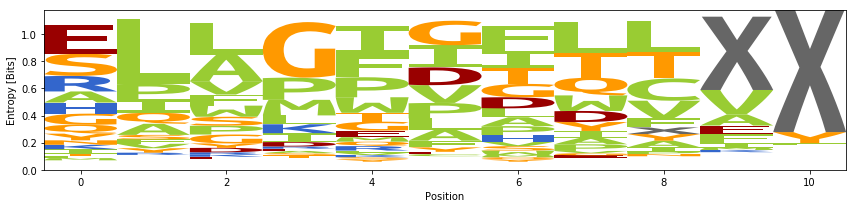

In [67]:
logo_plot2(truth_pos)

In [92]:
def logoplot_distribution(distribution, title='', outfile=None):
    logoplot = np.array([ distribution[aa]/sum(distribution.values()) for aa in sorted(distribution) ])
    logoplot  = np.diag(logoplot)
    #print(logoplot)
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)

    entropy = np.array([1.]*20)
    aminoacids = ''.join(sorted(mpl_logoplot.COLORS['protein'].keys()))
    mpl_logoplot.logoplot(ax, logoplot, aminoacids, height=entropy, color='protein')

    ax.set_xlabel('Amino Acids')
    ax.set_ylabel('Distribution')
    ax.set_title(title)

    fig.tight_layout()
    plt.show()
    if outfile:
        fig.savefig(outfile)

In [1348]:
seq = arrays[3]
seq = seq / np.sum(seq, axis=1, keepdims=True)
#seq = np.clip(seq, 1e-8, 1-1e-8)
#entropy = -np.sum(seq * np.log(seq), axis=1)

AAs S Apos length: (56,)
None
AAs S Pos_pred length: (43,)
None
AAs S Aneg length: (280,)
None
AAs S Neg_pred length: (208,)
None


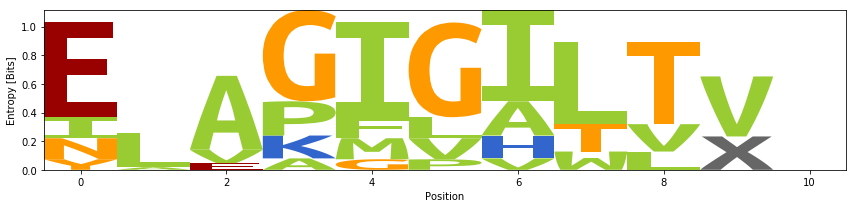

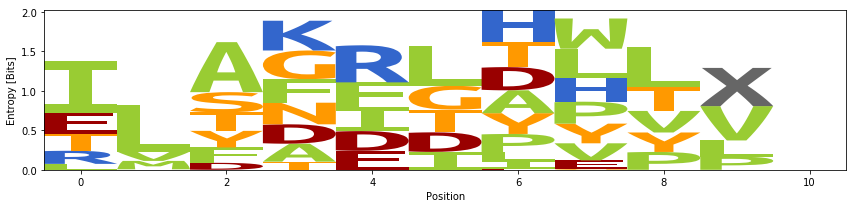

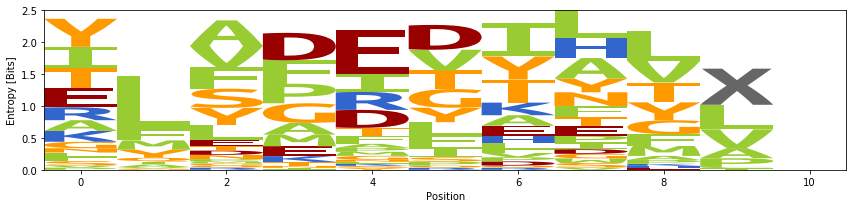

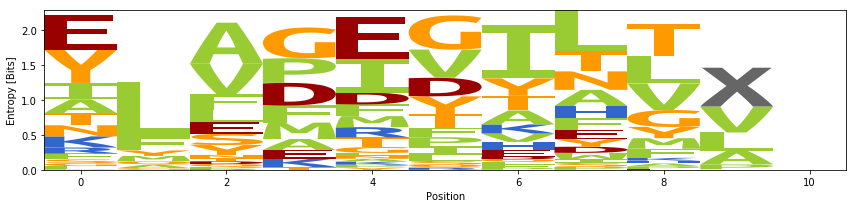

In [28]:
df = extract_preds(filename = "CSV/CSV_big3.csv", comment = "all80 S", val_set = 0,
                        uber_list = uber_list,
                       filenames = True, length = 20)
factors = np.array(df[0].values)
factors = np.apply_along_axis(lambda x: np.where(x == 0, 1, x), 0, factors)


#Extract pos and neg predictions and truth
pos = df[df[0] > 10]["filenames"]
posf = factors[df[0] > 1]
neg = df[df[0] < 1]["filenames"]
negf = factors[df[0] < 1]

truepos = df[df["filenames"].str.contains("P1")]["filenames"]
trueneg = df[~df["filenames"].str.contains("P1")]["filenames"]
trueneg = df[~df["filenames"].str.contains("S1")]["filenames"]

#Extract actual sequences
actual_pos = extract_sequences(truepos)
actual_neg = extract_sequences(trueneg)
pos_pred = extract_sequences(pos)
neg_pred = extract_sequences(neg)

names = ["Apos", "Pos_pred", "Aneg", "Neg_pred"]
dfs = [actual_pos, pos_pred, actual_neg, neg_pred]
factors = [None, posf, None, negf]

for name, df, factor in zip(names, dfs, factors):
    savepath = None
    print(comment, name, "length:", df.shape)
    print(savepath)
    
    #savepath = "img/logoplot/" + str(comment) + str(name) + ".png"
    
    
    array = logo_array(df, factor)
    logo_plot(array, savepath)
    
    #logo_plot(df, factor, savepath)
#logo_plot(actual_pos)


In [2055]:
all80pos_pred = logo_array(dfs[1])
all80neg_pred = logo_array(dfs[3])

In [2053]:
truth_pos = logo_array(dfs[0])
AApos_pred = logo_array(dfs[1])
truth_neg = logo_array(dfs[2])
AAneg_pred = logo_array(dfs[3])

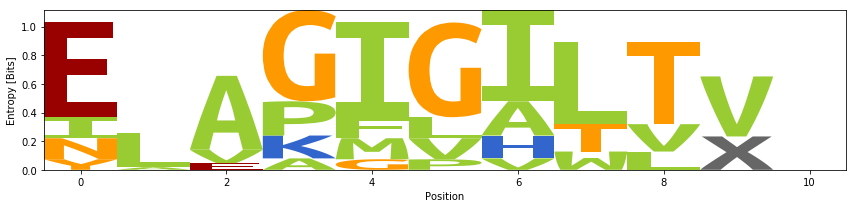

In [2063]:
logo_plot(truth_pos)

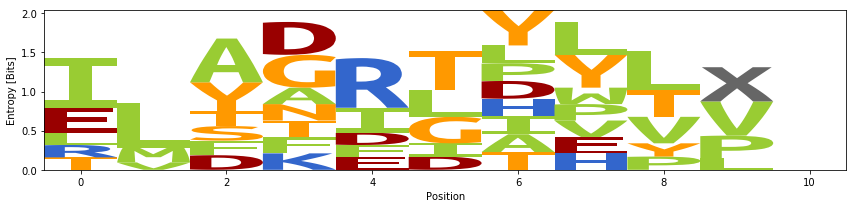

In [2064]:
logo_plot(AApos_pred)

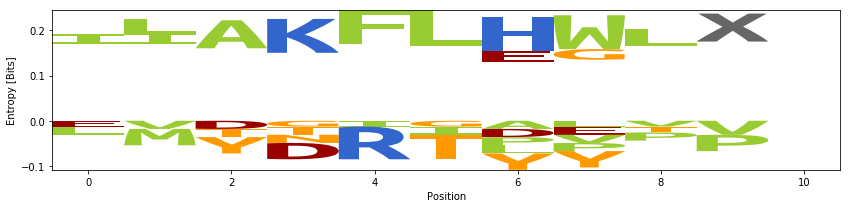

In [2056]:
logo_plot2(all80pos_pred, AApos_pred)

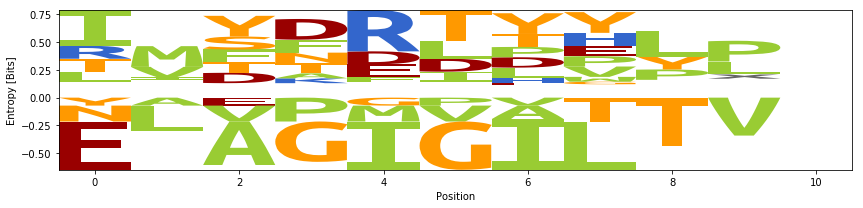

In [2062]:
logo_plot2(all80pos_pred, truth_pos)

Truth removed


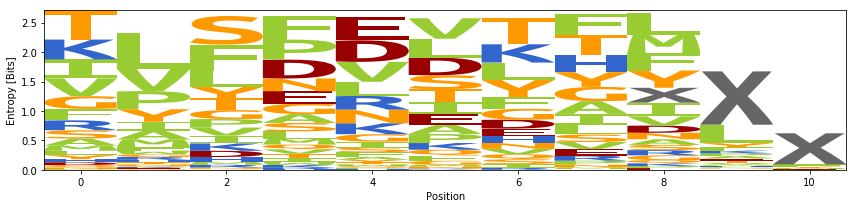

In [1277]:
logo_plot(array, truth = truth_pos, savepath = None)

(244,)
(76,)
(976,)
(717,)
AAs S Apos length:
None
AAs S Pos_pred length:
None
AAs S Aneg length:
None
AAs S Neg_pred length:
None


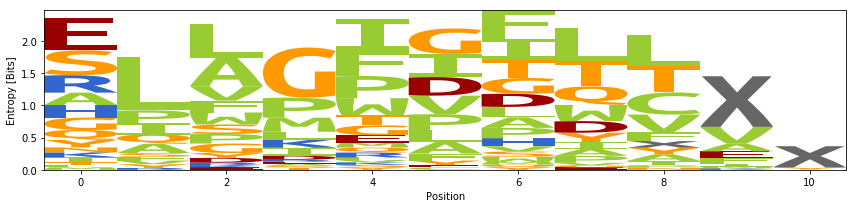

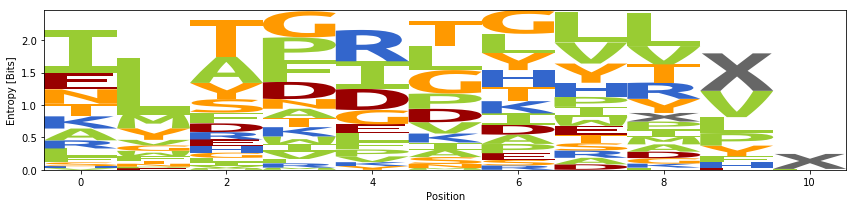

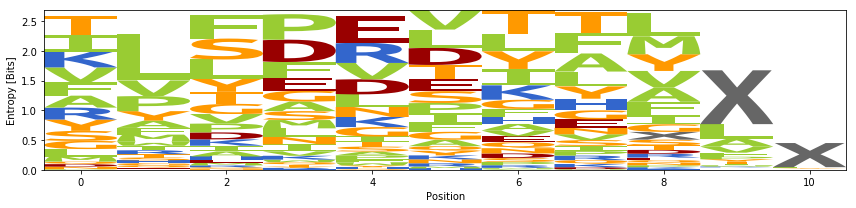

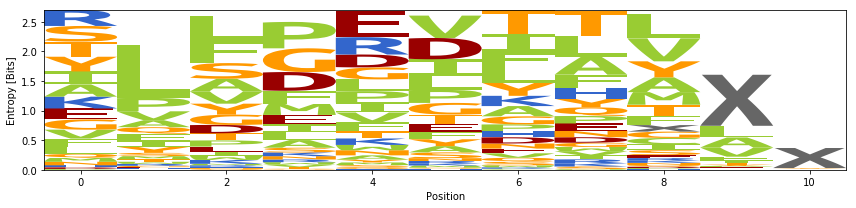

In [29]:
#Concat all validation set predictions and factors
comment = "AAs S"
dfs_seqs = []
dfs_fac = []
df_temp = pd.DataFrame()

#Concat all validation sets
for i in range(0, 5):
    df = extract_preds(filename = "CSV/CSV_big3.csv", comment = "AAs", val_set = i,
                            uber_list = uber_list,
                           filenames = True, length = 20)
    factors = np.array(df[0].values)
    factors = np.apply_along_axis(lambda x: np.where(x == 0, 1, x), 0, factors)
    #append
    dfs_seqs.append(df)
    dfs_fac.append(factors)
df = pd.concat(dfs_seqs)
factors = np.hstack(dfs_fac)



#Extract pos and neg predictions and truth
pos = df[df[0] > 15]["filenames"]
posf = factors[df[0] > 15]
neg = df[df[0] < 1]["filenames"]
negf = factors[df[0] < 1]

truepos = df[df["filenames"].str.contains("P1")]["filenames"]
trueneg = df[~df["filenames"].str.contains("P1")]["filenames"]
trueneg = trueneg[~trueneg.str.contains("S1")]

#Extract actual sequences
actual_pos = extract_sequences(truepos)
actual_neg = extract_sequences(trueneg)
pos_pred = extract_sequences(pos)
neg_pred = extract_sequences(neg)

names = ["Apos", "Pos_pred", "Aneg", "Neg_pred"]
dfs = [actual_pos, pos_pred, actual_neg, neg_pred]
factors = [None, posf, None, negf]

truth_pos = logo_array(dfs[0].values)
truth_neg = logo_array(dfs[2].values)
#truth = [False, truth_pos, False, truth_neg]

#Create logo arrays
arrays = []
for df, factor in zip(dfs, factors):
    array = logo_array(df, factor)
    arrays.append(array)
    print(df.shape)
        
#Print logo arrays
for name, array in zip(names, arrays):
    print(comment, name, "length:")
    print(savepath)
    #savepath = "img/logoplot/" + str(comment) + str(name) + ".png"
    savepath = None
    logo_plot(array, savepath)

        
    

(244,)
(112,)
(976,)
(668,)
(244,)
AAs S Apos length:
None
AAs S Pos_pred length:
None
AAs S Aneg length:
None
AAs S Neg_pred length:
None
AAs S Aswitch length:
None


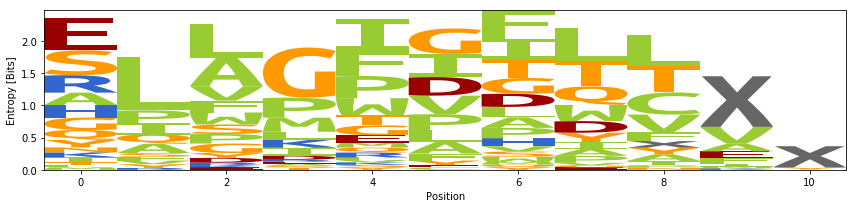

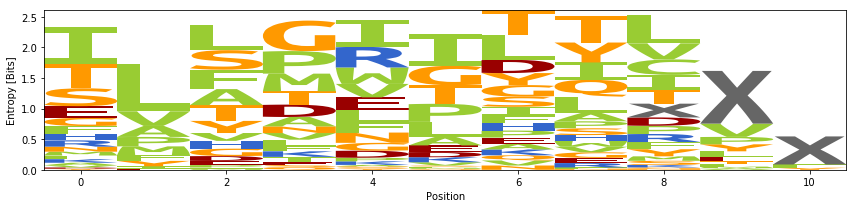

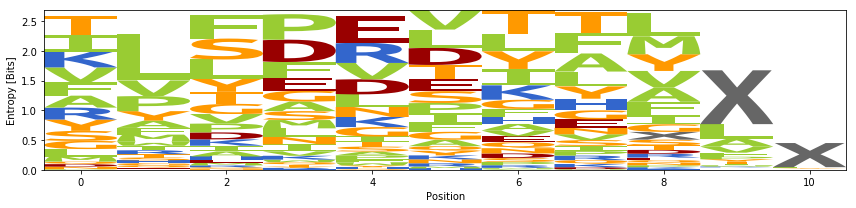

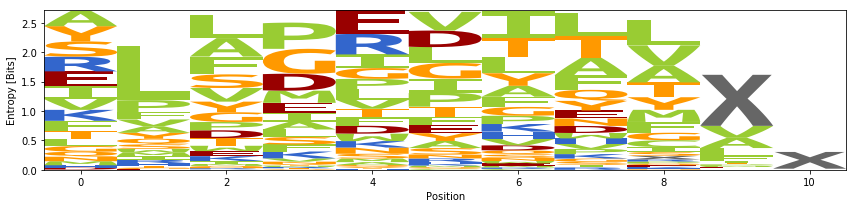

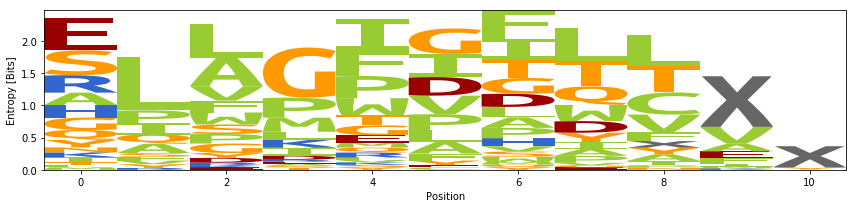

In [32]:
#Concat all validation set predictions and factors
comment = "AAs S"
dfs_seqs = []
dfs_fac = []
df_temp = pd.DataFrame()

#Concat all validation sets
for i in range(0, 5):
    df = extract_preds(filename = "CSV/CSV_big3.csv", comment = "all80 S", val_set = i,
                            uber_list = uber_list,
                           filenames = True, length = 20)
    factors = np.array(df[0].values)
    factors = np.apply_along_axis(lambda x: np.where(x == 0, 1, x), 0, factors)
    #append
    dfs_seqs.append(df)
    dfs_fac.append(factors)
df = pd.concat(dfs_seqs)
factors = np.hstack(dfs_fac)



#Extract pos and neg predictions and truth
pos = df[df[0] > 15]["filenames"]
posf = factors[df[0] > 15]
neg = df[df[0] < 1]["filenames"]
negf = factors[df[0] < 1]

#get truth arrays
truepos = df[df["filenames"].str.contains("P1")]["filenames"]
trueswitch = df[df["filenames"].str.contains("S1")]["filenames"]
trueneg = df[~df["filenames"].str.contains("P1")]["filenames"]
trueneg = trueneg[~trueneg.str.contains("S1")]

#Extract actual sequences
actual_pos = extract_sequences(truepos)
actual_switch = extract_sequences(trueswitch)
actual_neg = extract_sequences(trueneg)
pos_pred = extract_sequences(pos)
neg_pred = extract_sequences(neg)

names = ["Apos", "Pos_pred", "Aneg", "Neg_pred", "Aswitch"]
dfs = [actual_pos, pos_pred, actual_neg, neg_pred, actual_switch]
factors = [None, posf, None, negf, None]

truth_pos = logo_array(dfs[0].values)
truth_switch = logo_array(dfs[4].values)
truth_neg = logo_array(dfs[2].values)
#truth = [False, truth_pos, False, truth_neg]

#Create logo arrays
arrays = []
for df, factor in zip(dfs, factors):
    array = logo_array(df, factor)
    arrays.append(array)
    print(df.shape)
        
#Print logo arrays
for name, array in zip(names, arrays):
    print(comment, name, "length:")
    print(savepath)
    #savepath = "img/logoplot/" + str(comment) + str(name) + ".png"
    savepath = None
    logo_plot(array, savepath)

        
    

In [2035]:
#df = extract_preds(filename = "CSV/CSV_big3.csv", comment = "AAs", val_set = 3,
#                        uber_list = uber_list,
#                       filenames = True, length = 20)

comment = "all80rp"
dfs = []
df0 = pd.DataFrame()
for i in range(0,5):
    df = extract_preds(filename = "CSV/CSV_big3.csv", comment = comment, val_set = i,
                        uber_list = uber_list, filenames = True, length = 20)
    dfs.append(df)
df = pd.concat(dfs)

#Extract pos and neg predictions and truth
pos = df[df[0] > 15]["filenames"]
neg = df[df[0] < 1]["filenames"]
truepos = df[df["filenames"].str.contains("P1")]["filenames"]
trueneg = df[~df["filenames"].str.contains("P1")]["filenames"]
trueneg = df[~df["filenames"].str.contains("S1")]["filenames"]

#Extract actual sequences
actual_pos = extract_sequences(truepos)
actual_neg = extract_sequences(trueneg)
pos_pred = extract_sequences(pos)
neg_pred = extract_sequences(neg)

names = ["Apos", "Pos_pred", "Aneg", "Neg_pred"]
dfs = [actual_pos, pos_pred, actual_neg, neg_pred]

for name, df in zip(names, dfs):
    print(comment, name, df.shape)
    print(savepath)
    savepath = "img/logoplot/" + str(comment) + str(name) + ".png"
    savepath = None
    logo_plot(df, savepath)
#logo_plot(actual_pos)


all80rp Apos (244,)
None


ValueError: the 'keepdims' parameter is not supported in the pandas implementation of sum()

Actual pos (48,)
None
Pos pred (48,)
None
Actual neg (240,)
None
Neg pred (204,)
None


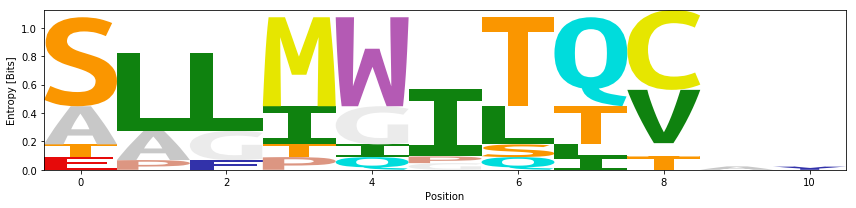

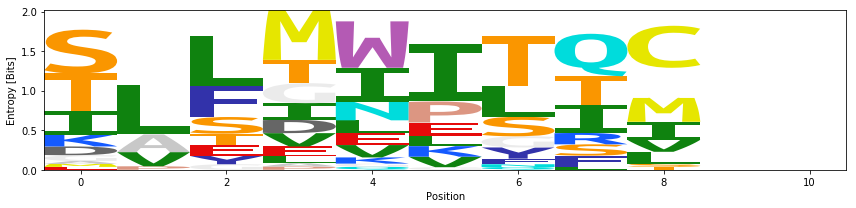

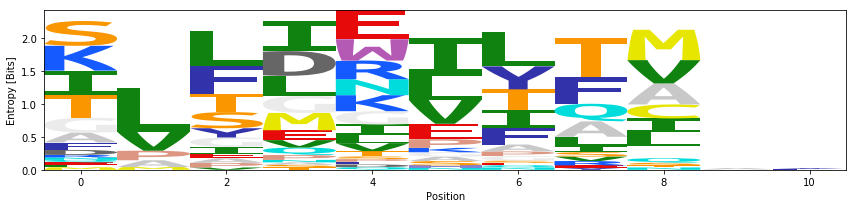

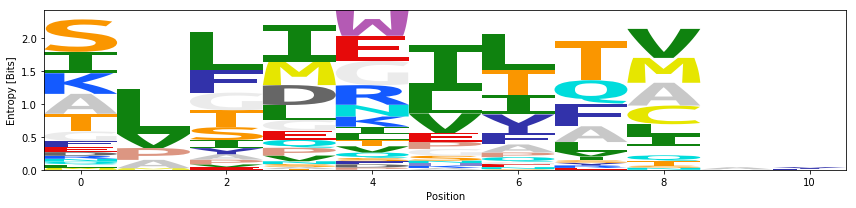

In [998]:
df = extract_preds(filename = "CSV/CSV_big3.csv", comment = "AAs S", val_set = 2,
                        uber_list = uber_list,
                       filenames = True, length = 20)

#Extract pos and neg predictions and truth
pos = df[df[0] > 10]["filenames"]
neg = df[df[0] < 5]["filenames"]
truepos = df[df["filenames"].str.contains("P1")]["filenames"]
trueneg = df[~df["filenames"].str.contains("P1")]["filenames"]

#Extract actual sequences
actual_pos = extract_sequences(truepos)
actual_neg = extract_sequences(trueneg)
pos_pred = extract_sequences(pos)
neg_pred = extract_sequences(neg)

names = ["Actual pos", "Pos pred", "Actual neg", "Neg pred"]
dfs = [actual_pos, pos_pred, actual_neg, neg_pred]

for name, df in zip(names, dfs):
    print(name, df.shape)
    print(logo_plot(df))
#logo_plot(actual_pos)


#### Plot




In [18]:
#testimng

In [19]:
!pwd

/home/maghoi/Magnus_pMHC


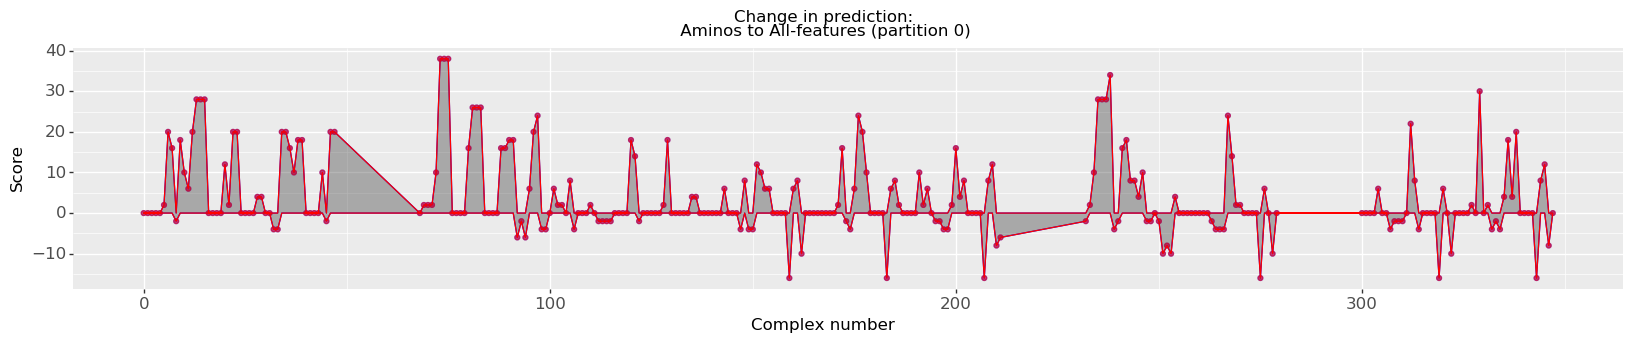

<ggplot: (8742494566222)>

In [418]:
melt_df1, _ = load_data(filename = "CSV/CSV_big.csv", comment = "all56 S", val_set = 2, uber_list = uber_list)
melt_df2, _ = load_data(filename = "CSV/CSV_big.csv", comment = "AAs S", val_set = 2, uber_list = uber_list)
melt_df = melt_df1.copy()
melt_df["value"] = melt_df1["value"] - melt_df2["value"]
melt_df = melt_df
plot_heatmap_same(melt_df, melt_df, name = "Change in prediction:\n Aminos to All-features (partition 0)")

In [716]:
shape_list

[[56, 168, 56, 56],
 [52, 156, 52, 52],
 [48, 144, 48, 48],
 [44, 132, 44, 44],
 [44, 132, 44, 44]]

In [110]:
def net_change(melt_df, shapes):
    melt_df = melt_df.copy()
    #melt_df["value"] = melt_df["value"].apply(lambda x: np.where(x == 0, 0.5, x))
    
    pos_sum = sum(melt_df.iloc[shapes[0]:shapes[1]]["value"])
    pos_len = len(melt_df.iloc[shapes[0]:shapes[1]])
    pos_change = pos_sum / pos_len
    
    neg_sum = sum(melt_df.iloc[sum(shapes[0:1]): sum(shapes[0:2])]["value"])
    neg_len = len(melt_df.iloc[sum(shapes[0:1]): sum(shapes[0:2])])
    neg_change = neg_sum / neg_len
    print(neg_sum, neg_len)
    
    r_sum = sum(melt_df.iloc[sum(shapes[0:2]): sum(shapes[0:3])]["value"])
    r_len = len(melt_df.iloc[sum(shapes[0:2]): sum(shapes[0:3])])
    print(r_sum, r_len)
    r_change = r_sum / r_len
    
    s_sum = sum(melt_df.iloc[sum(shapes[0:3]): sum(shapes[0:4])]["value"])
    s_len = len(melt_df.iloc[sum(shapes[0:3]): sum(shapes[0:4])])
    s_change = s_sum / r_len
    
    print("Pos", round(pos_change, 3), "Neg", round(neg_change, 3),
          "\nRan", round(r_change, 3), "Switch", round(s_change, 3))
    
net_change(melt_df, rshape_list[1])

NameError: name 'melt_df' is not defined

In [111]:
def fix_width(melt_df, val_set):
    df = melt_df.copy()
    shapes = shape_list[val_set]
    melt_df.iloc[shapes[0]] = 0
    melt_df.iloc[sum(shapes[0:2])] = 0 
    melt_df.iloc[sum(shapes[0:3])] = 0 
    return(df)

In [112]:
shapes = shape_list[val_set].copy()
shapes.insert(0, 0)
ix_names = pd.Series(range(0, sum(shapes), 1))
count = 0

#Reset index/column names to range while adding separator to create distance between partitions
for i in range(1, len(shapes)-1):
    count += shapes[i]
    ix_names[count : sum(shapes)] += 20


In [113]:
def fix_width(melt_df, val_set):
    #Insert index
    shapes = shape_list[val_set].copy()
    df = melt_df.copy()
    df.reset_index()

    for i in range(1, len(shapes)):
        index = sum(shapes[0: i])
        line1 = pd.DataFrame({"variable": index, "value": 0}, index=[index-1])
        line2 = pd.DataFrame({"variable": index, "value": 0}, index=[index])
        df = pd.concat([df.iloc[: index], line1, line2, df.iloc[index:]]).reset_index(drop=True)
        
    #Reset index in variable
    shapes.insert(0, 0)
    
    #NB!!!! New total length must match length from added line
    ix_names = pd.Series(range(0, sum(shapes)+6, 1)) ##!!
    count = 0

    #Reset index/column names to range while adding separator to create distance between partitions
    for i in range(1, len(shapes)-1):
        count += shapes[i]
        ix_names[count+1 : sum(shapes)+6] += 20 ##!!
        
    df["variable"] = ix_names
    return(df)

In [114]:
def all_df_filenames(melt_df1, melt_df2, f1, val_set, shape_list):
    all_df = melt_df2.copy();
    all_df["value2"] = melt_df1["value"]; all_df["delta"] = all_df["value2"] - all_df["value"]
    all_df["filenames"] = f1
    all_df.columns = ["Position", "Aminos", "All-features", "Delta AAs -> AAs", "Filenames"]
    shapes = shape_list[val_set]
    count = 0
    
    
    ix_names = pd.Series(range(0, sum(shapes), 1)) ##!!
    
    for i in range(1, len(shapes)-1):
        count += shapes[i]
        ix_names[count+1 : sum(shapes)] += 20
    all_df["Position"] = ix_names
    return(all_df)


### Autosave CSV and graphs

#### Save filenames for train and validation set

In [1285]:
csv_list = glob.glob("data/*.csv")

#### Start plotting!

In [115]:
def plot_heatmap_same(melt_df1, melt_df2, name):
    return(ggplot(melt_df1, aes("variable", "value"))
     + geom_area(data = melt_df2, color = "blue", alpha = 0.2)
     + geom_point(data = melt_df2, color = "blue", alpha = 0.5)
     + geom_area(data = melt_df1, color = "red", alpha = 0.2, size = 0.5)
     + geom_point(data = melt_df1, color = "red", alpha = 0.5)
     + coord_equal()
     + theme(axis_text_x=element_text(size = 8))
     + ggtitle(name)
     + expand_limits(y = [1, 0])
     + xlab("Complex number")
     + ylab("Score")
     #+ theme_light()
     + theme(figure_size =(20,20), text = element_text(size = 12))
    )

In [55]:
def feature_extract2(score = [], filenames = [], comments = [], partitions = []):
    #Extracts features from CSV file
    dfs = pd.DataFrame()
    length = 100
    
    for i in range(len(filenames)):
        df = pd.read_csv(filenames[i])
        df = df[df["Comment"].astype(str).str.contains(comments[i])]
        
        if partitions:
            for i2 in range(len(partitions)):
                df = df[df["Validation"].astype(str).str.contains(str(partitions[i2]))]
                length = 20
            
        df = df[score[i]][0:length]
        dfs = pd.concat([dfs, df], axis = 1)
    
    #Return
    dfs.columns = comments
    dfs.index = range(0, length)
    return dfs

In [56]:
def multi_load(filenames, comments, titles, val_set, uber_list, length = 20):
    dfs = []
    fs = []
    for i in range(len(filenames)):
        melt_df, f = load_data(filename = filenames[i],
                               comment = comments[i],
                               val_set = val_set[i],
                               uber_list = uber_list,
                               filenames = True,
                              length = length)
        
        #Add type
        f = pd.Series(f)
        p_ix = f[f.str.contains(".*P1.*")].index
        n_ix = f[f.str.contains(".*N\d.*")].index
        r_ix = f[f.str.contains(".*R1.*")].index
        s_ix = f[f.str.contains(".*S1.*")].index
        
        melt_df["Type"] = "Negative"
        melt_df["Type"][p_ix] = "Positive"
        melt_df["Type"][r_ix] = "Random"
        melt_df["Type"][s_ix] = "Switch"
        #print(melt_df)
        
        #melt_df = fix_width(melt_df, 0)
        cats = ["Positive", "Negative", "Random", "Switch"]
        melt_df["Type"] = pd.Categorical(melt_df["Type"], categories = cats, ordered=True)
        dfs.append(melt_df)
        fs.append(f)
    return(dfs, fs)

In [57]:
def multi_load2(filenames, comments, titles, val_set, uber_list, length = 20):
    dfs = []
    fs = []
    for i in range(len(filenames)):
        melt_df, f = load_data2(filename = filenames[i],
                               comment = comments[i],
                               val_set = val_set[i],
                               uber_list = uber_list,
                               filenames = True,
                              length = length)
        
        #Add type
        f = pd.Series(f)
        p_ix = f[f.str.contains(".*P1.*")].index
        n_ix = f[f.str.contains(".*N\d.*")].index
        r_ix = f[f.str.contains(".*R1.*")].index
        s_ix = f[f.str.contains(".*S1.*")].index
        
        melt_df["Type"] = "Negative"
        melt_df["Type"][p_ix] = "Positive"
        melt_df["Type"][r_ix] = "Random"
        melt_df["Type"][s_ix] = "Switch"
        #print(melt_df)
        
        #melt_df = fix_width(melt_df, 0)
        cats = ["Positive", "Negative", "Random", "Switch"]
        melt_df["Type"] = pd.Categorical(melt_df["Type"], categories = cats, ordered=True)
        dfs.append(melt_df)
        fs.append(f)
    return(dfs, fs)

In [58]:
def plot_heatmap3(melt_df1, name, color = "red", length = 20):
    return(ggplot(melt_df1, aes("variable", "value"))
     + geom_area(aes(colour = "Type"), data = melt_df1, alpha = 0.2, size = 0.5)
     + geom_point(data = melt_df1, alpha = 0.2, color = "black", size = 0.4)
     + theme(axis_text_x=element_text(size = 12))
     + ggtitle(name)
     + xlab("Complex number")
     + ylab("Score")
     + expand_limits(y=[0, length])
    + scale_y_continuous(breaks=(0,5,10,15,20))
     + theme(figure_size = ([20,2]), text = element_text(size = 20))
    + scale_color_manual(["firebrick", "royalblue", "deepskyblue", "purple"])
    )

In [59]:
def plot_heatmap3(melt_df1, name, color = "red", length = 20):
    return(ggplot(melt_df1, aes("variable", "value"))
     + geom_area(aes(colour = "Type"), data = melt_df1, alpha = 0.2, size = 0.5)
     + geom_point(data = melt_df1, alpha = 0.2, color = "black", size = 0.4)
     + theme(axis_text_x=element_text(size = 12))
     + ggtitle(name)
     + xlab("Complex number")
     + ylab("Score")
     + expand_limits(y=[0, length])
    + scale_y_continuous(breaks=(-20, -15, -10, -5, 0,5,10,15,20))
     + theme(figure_size = ([20,2]), text = element_text(size = 20))
    + scale_color_manual(["firebrick", "royalblue", "deepskyblue", "purple"])
    )

In [60]:
print(i2)
comments = ["AApep", "Struc36", "24energy", "Struc\+24", "AAs S", "all80rp", "all80 S"]
filenames = ["CSV/CSV_big3.csv"]*len(comments)
titles = ["Aminos(-peptide)", "Structure", "24 Energy", "Structure + 24 Energy", "Aminos", "All features (with RP)", "All features (w/o RP)"]
savenames = ["amino_minuspep", "struc", "24energy", "struc24energy", "aminos", "All_RP)", "All_noRP"]

val_set = [i2] * len(filenames)
#colors = ["blue"]*len(filenames)

for i in range(len(titles)): titles[i] = "Prediction graph (validation set " + str(val_set[i])+"):\n" + titles[i]+"\n"

dfs, fs = multi_load2(filenames, comments, titles, val_set, uber_list, length = 20)


0


In [1697]:
for i in range(0, 1):
    plot = plot_heatmap3(dfs[i], titles[i], length = 20)
    #plot.save(filename = "img/pred_graph_val_"+str(i)+".png", verbose = True)
    print(plot)

PlotnineError: 'data must be a dataframe or None if each layer will have separate data.'

#### Extract ALL predictions

In [1683]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://memegenerator.net/img/instances/65970720.jpg",
     height = 500, width = 500)

In [2034]:
df = pd.read_csv("CSV/CSV_big3.csv")
pd.DataFrame(Counter(df["Comment"]).most_common())

0    1
0               all56 S:20 X:0_56  200
1                 AAs S:20 X:0_20  195
2               all80 S:20 X:0_80  120
3          Struc+24E S:20 X:20_80  120
4         all80rpunit S:20 X:0_80  100
5           24energy S:20 X:56_80  100
6            Struc36 S:20 X:20_56  100
7     AApep S:20 X:0_20 M:181_192  100
8                        Test S:1   35
9        all80 unitrp S:20 X:0_80    8
10  Struc+24E unitrp S:20 X:20_80    5
11         AAs unitrp S:20 X:0_20    5
12       all56 unitrp S:20 X:0_56    2

In [1708]:
titles[0]

'Prediction graph:\nAminos\n'

Prediction graph:
Aminos
 AAs S CSV/CSV_big3.csv


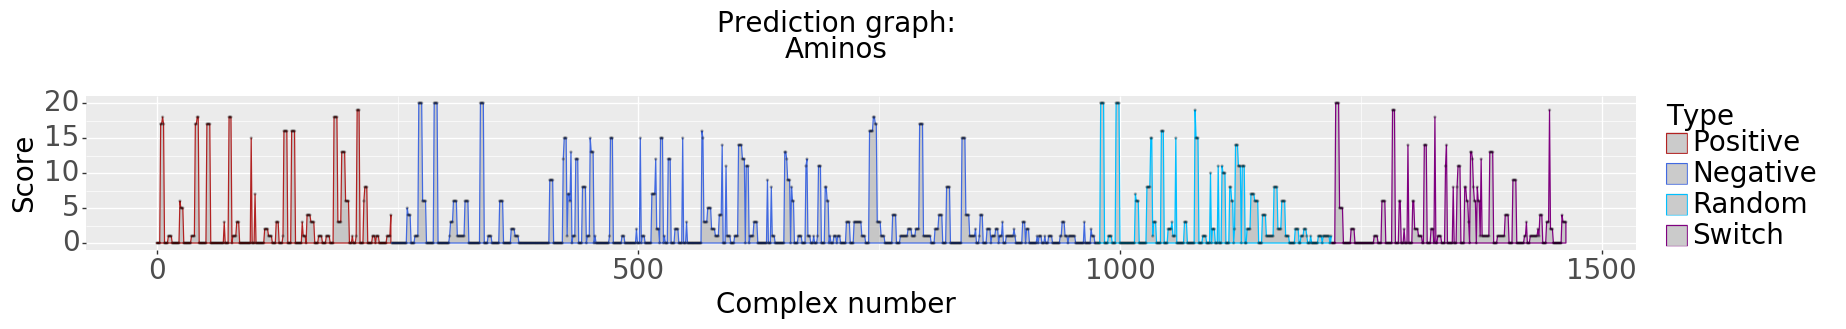

<ggplot: (-9223363309409424629)>
Saving to img/superpreds_aminos2.png
Prediction graph:
All features
 all80 S CSV/CSV_big3.csv


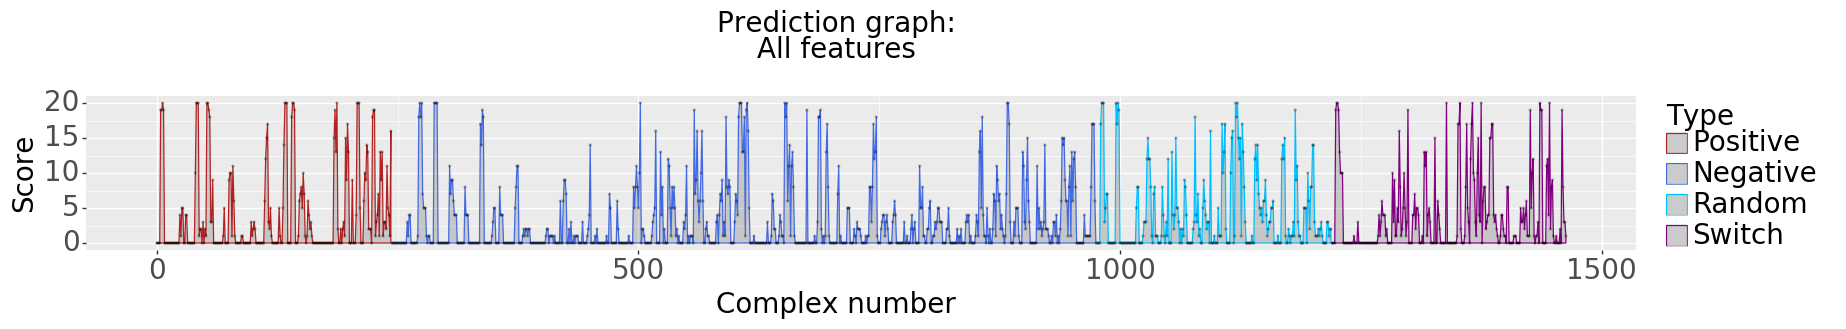

<ggplot: (-9223363309408977099)>
Saving to img/superpreds_all802.png
Prediction graph:
AA + Energy
 AAenergy CSV/CSV_Master4.csv


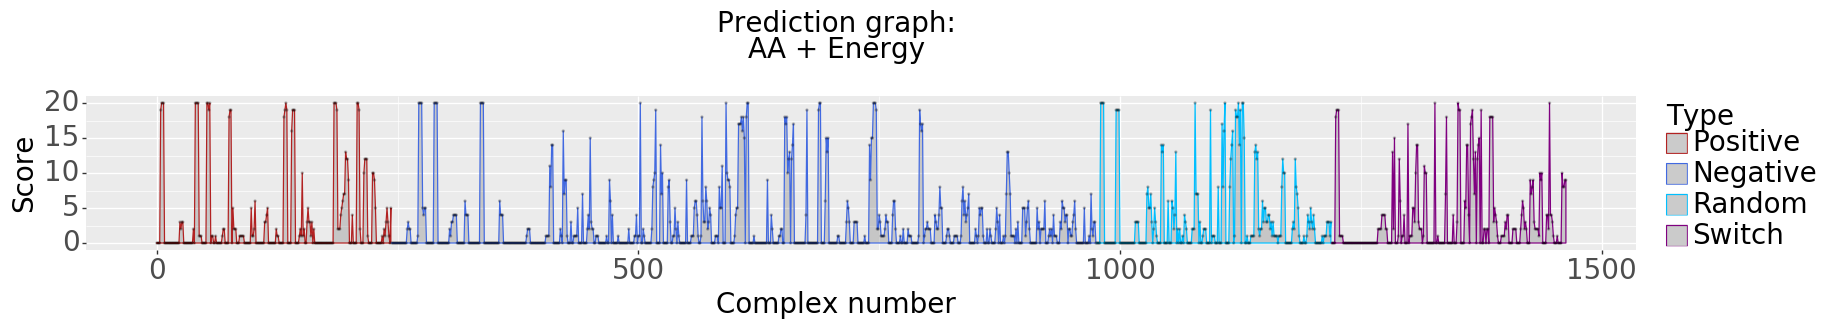

<ggplot: (8727445626288)>
Saving to img/superpreds_AAenergy2.png


In [94]:
comments = ["AAs S", "all80 S", "AAenergy"]
savenames = ["aminos", "all80", "AAenergy"]
filenames = ["CSV/CSV_big3.csv"]*2 + ["CSV/CSV_Master4.csv"]
titles = ["Aminos", "All features", "AA + Energy"]

for i in range(len(titles)):
    titles[i] = "Prediction graph:\n" + titles[i] + "\n"
    savenames[i] = savenames[i]+"2"

uber_dfs = []
uber_files = []
for i3 in range(0, len(comments)):
    print(titles[i3], comments[i3], filenames[i3])

    dfs = []
    for i2 in range(0, 5):
        #Same settings for each val-set
        comment = [comments[i3]]
        filename = [filenames[i3]]
        title = titles[i3]

        #Load from valset and append to dfs
        #val_set = [i2] * len(filenames)
        val_set = [i2]
        df, fs = multi_load2(filename, comment, title, val_set, uber_list, length = 20)
        dfs.append(df)
        uber_files.append(fs)
        

        #Extract groups
        list_pos = []
        list_neg = []
        list_random = []
        list_switch = []
        for i in range(len(dfs)):
            df = dfs[i][0]
            pos = df[df["Type"].str.contains("Positive")]
            neg = df[df["Type"].str.contains("Negative")]
            random = df[df["Type"].str.contains("Random")]
            switch = df[df["Type"].str.contains("Switch")]
            list_pos.append(pos)
            list_neg.append(neg)
            list_random.append(random)
            list_switch.append(switch)

    #Concat to super df
    pos = pd.concat(list_pos).reset_index(drop=True)
    neg = pd.concat(list_neg).reset_index(drop=True)
    random = pd.concat(list_random).reset_index(drop=True)
    switch = pd.concat(list_switch).reset_index(drop=True)

    super_df = pd.concat((pos, neg, random, switch)).reset_index(drop=True)
    super_df["variable"] = super_df.index
    
    #Append to uber_dfs
    uber_dfs.append(super_df)

    #plot
    plot = plot_heatmap3(super_df, title)
    print(plot)
    filename = "img/superpreds_"+str(savenames[i3])+".png"
    print("Saving to", filename)
    #plot.save(filename = filename, verbose = True)
    

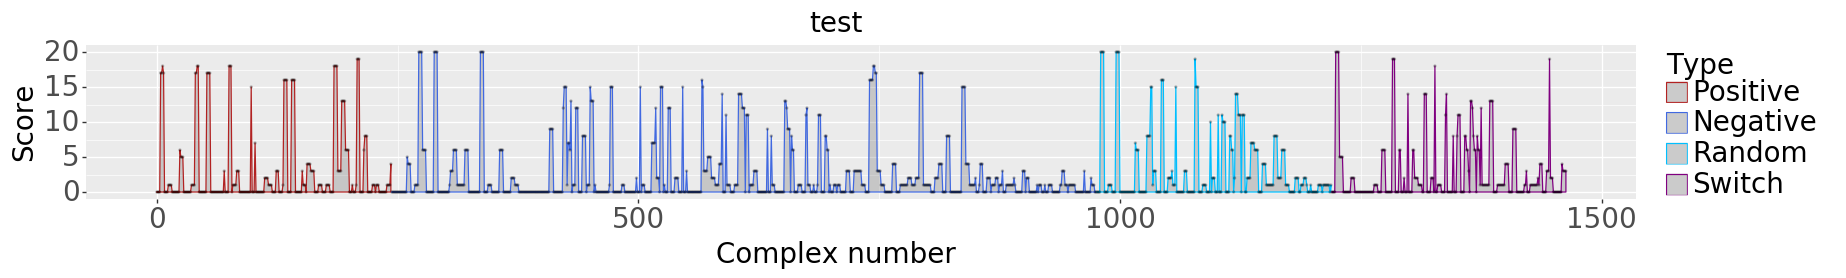

<ggplot: (8727445591651)>

In [122]:
plot_heatmap3(uber_dfs[0], "test")

In [100]:
len(uber_dfs)

3

In [95]:
import scipy
from scipy.stats import mannwhitneyu
df1 = uber_dfs[0] #Aminos
df2 = uber_dfs[1] #all-features

#Check positive group
df_high = df1[df1["Type"].str.contains("Positive")]
df_low = df2[df2["Type"].str.contains("Positive")]
pos_np = df_high["value"].values
neg_np = df_low["value"].values
print("Pos", scipy.stats.mannwhitneyu(pos_np, neg_np))

#Check Negative group
df_high = df1[~df1["Type"].str.contains("Positive")]
df_low = df2[~df2["Type"].str.contains("Positive")]
pos_np = df_high["value"].values
neg_np = df_low["value"].values
print("Pos", scipy.stats.mannwhitneyu(pos_np, neg_np))


Pos MannwhitneyuResult(statistic=27163.0, pvalue=0.03569339996284552)
Pos MannwhitneyuResult(statistic=687681.5, pvalue=0.0002995251445847536)


In [106]:
len(uber_dfs)

3

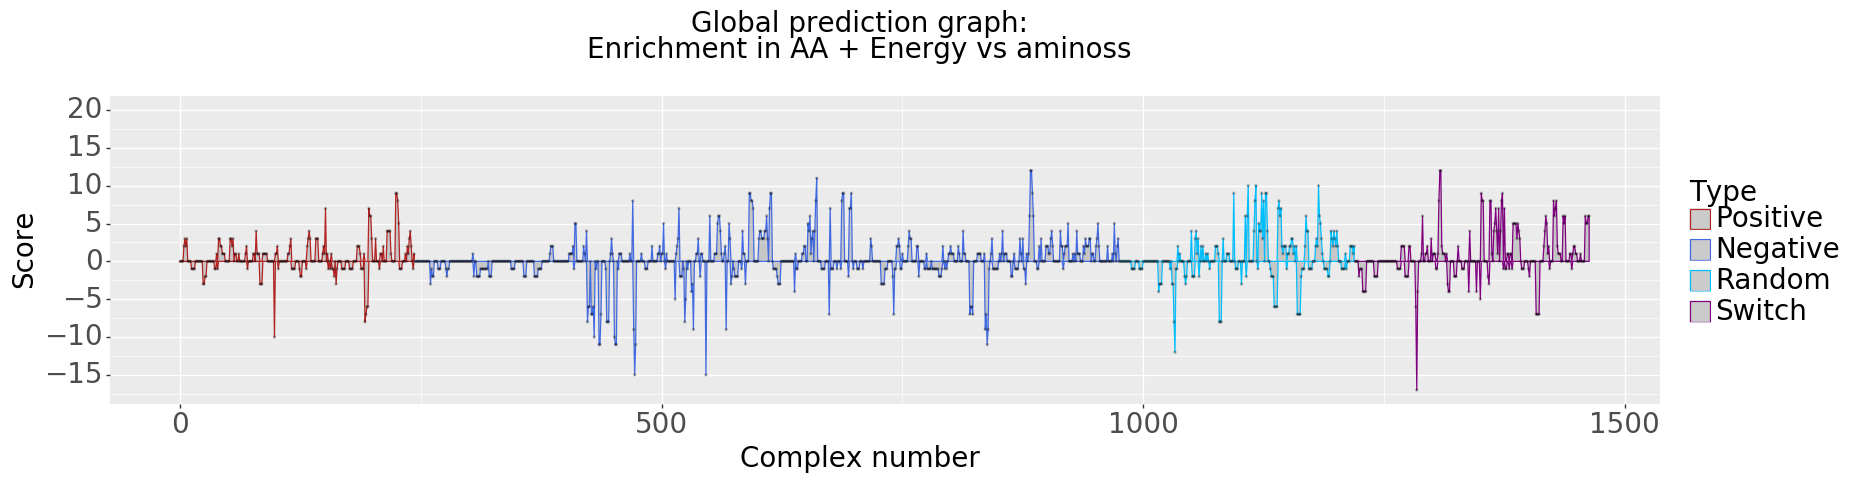

<ggplot: (-9223363309409290068)>

In [123]:
all_minus_aminos = uber_dfs[2].copy()
all_minus_aminos["value"] -= uber_dfs[0]["value"]
plot_heatmap4(all_minus_aminos, "Global prediction graph:\nEnrichment in AA + Energy vs aminoss\n")

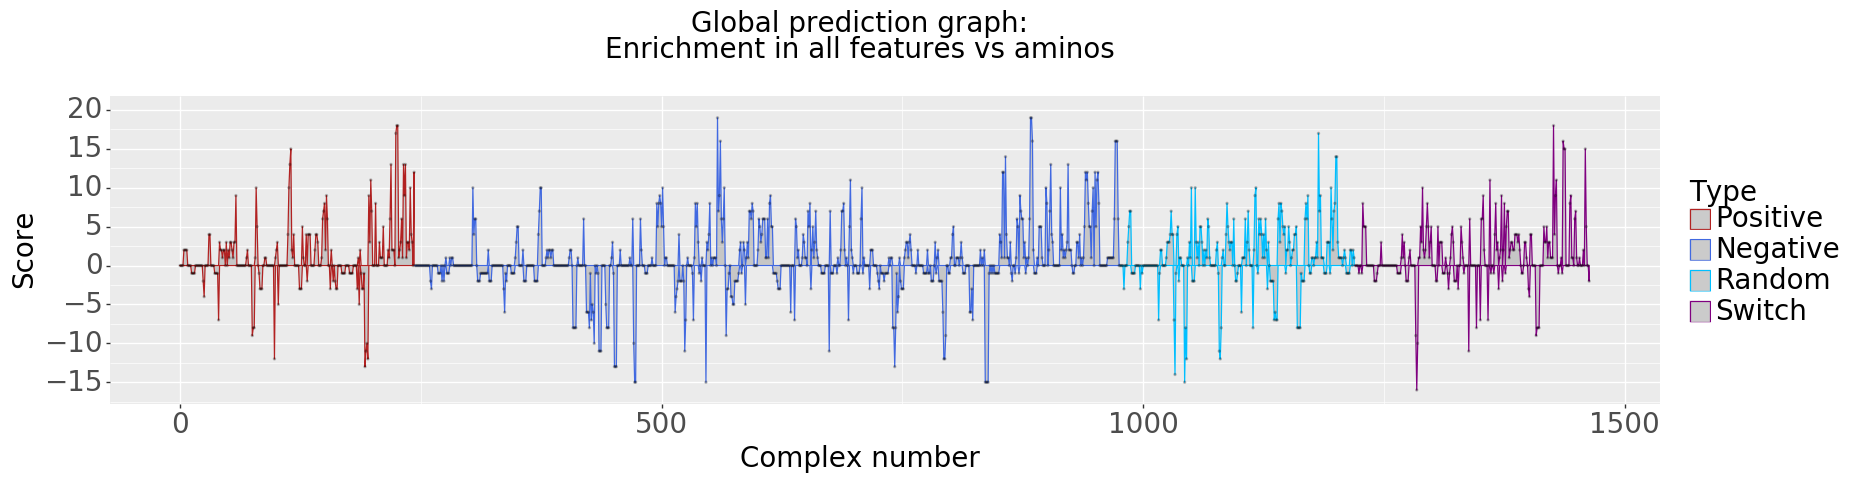

<ggplot: (8727445798748)>

In [124]:
all_minus_aminos2 = uber_dfs[1].copy()
all_minus_aminos2["value"] -= uber_dfs[0]["value"]
plot_heatmap4(all_minus_aminos2, "Global prediction graph:\nEnrichment in all features vs aminos\n")

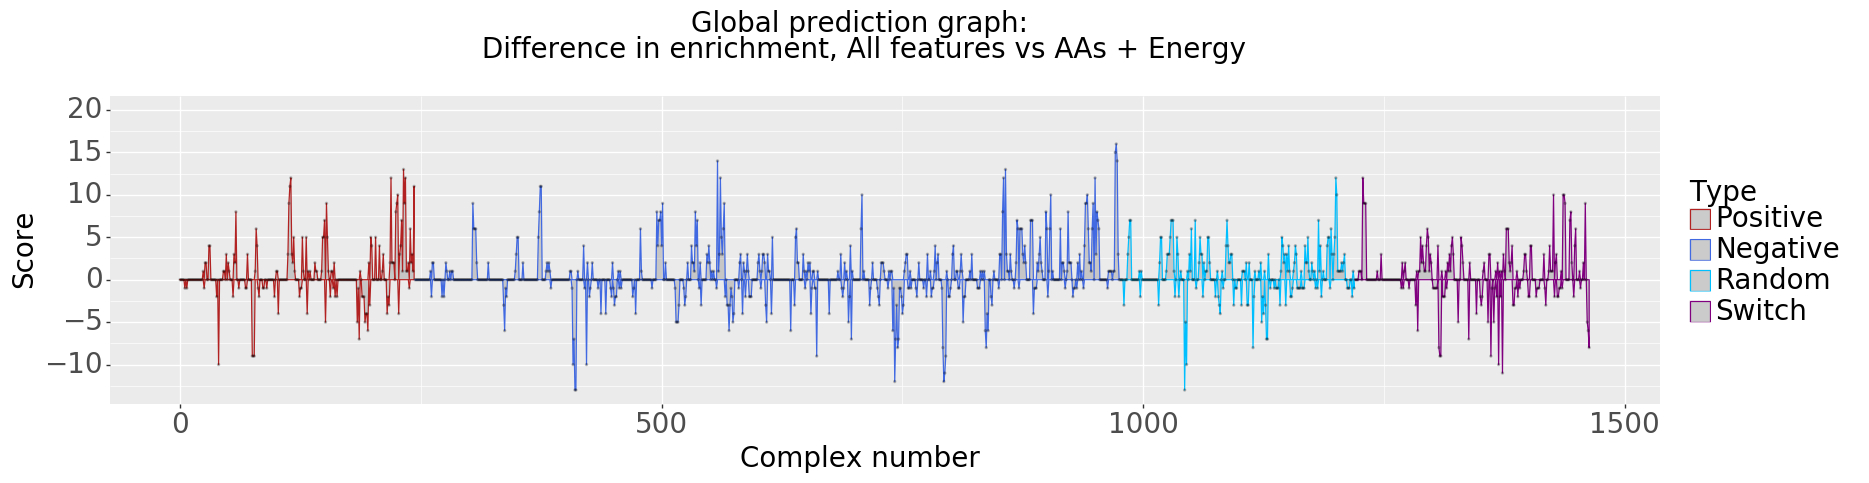

<ggplot: (-9223363309409458337)>

In [121]:
all_minus_aminos3 = all_minus_aminos2.copy()
all_minus_aminos3["value"] -= all_minus_aminos["value"]
plot_heatmap4(all_minus_aminos3, "Global prediction graph:\n Difference in enrichment, All features vs AAs + Energy\n")

In [125]:
print("Positive changes")
extract_stats(all_minus_aminos3, "Positive")
print("Negative changes")
extract_stats(all_minus_aminos3, "Negative")

Positive changes
Length: 244
Over No, avg, rat
[53, 5.189, 0.217]
under no, avg, rat
[29, -4.103, 0.119]
Negative changes
Length: 732
Over No, avg, rat
[145, 4.779, 0.198]
under no, avg, rat
[85, -4.365, 0.116]


In [102]:
def extract_stats(df, comment, comment2 = None):
    if comment2:
        df = df = df[df["Filenames"].str.contains(comment2)]
    df = df[df["Type"].str.contains(comment)]
    over_df = df["value"] > 1
    under_df = df["value"] < -1
    
    length = len(df)
    
    number_over = sum(over_df)
    avg_over = round(sum(df[over_df]["value"])/sum(over_df), 3)
    ratio_over = round(number_over/length, 3)
    
    number_under = sum(under_df)
    avg_under = round(sum(df[under_df]["value"])/sum(under_df), 3)
    ratio_under = round(number_under/length, 3)
    
    print("Length:", length)
    print("Over No, avg, rat")
    print([number_over, avg_over, ratio_over])
    print("under no, avg, rat")
    print([number_under, avg_under, ratio_under])

In [103]:
extract_stats(all_minus_aminos, "Positive")

Length: 244
Over No, avg, rat
[29, 4.103, 0.119]
under no, avg, rat
[53, -5.189, 0.217]


In [104]:
extract_stats(all_minus_aminos, "Negative")

Length: 732
Over No, avg, rat
[85, 4.365, 0.116]
under no, avg, rat
[145, -4.779, 0.198]


In [1853]:
#Extract filenames
temp = []
for i in range(len(uber_files[0:5])):
    temp.append(uber_files[i][0])
filenames = pd.concat(temp)
filenames = filenames.reset_index(drop=True)

In [1854]:
all_minus_aminos["Filenames"] = filenames

In [1880]:
aa_all = all_minus_aminos
t99 = aa_all[aa_all["Filenames"].str.contains("99s")].reset_index(drop=True)
t99["variable"] = t99.index
t95 = aa_all[aa_all["Filenames"].str.contains("95s")].reset_index(drop=True)
t95["variable"] = t95.index
t90 = aa_all[aa_all["Filenames"].str.contains("90s")].reset_index(drop=True)
t90["variable"] = t90.index
t80 = aa_all[aa_all["Filenames"].str.contains("80s")].reset_index(drop=True)
t80["variable"] = t80.index

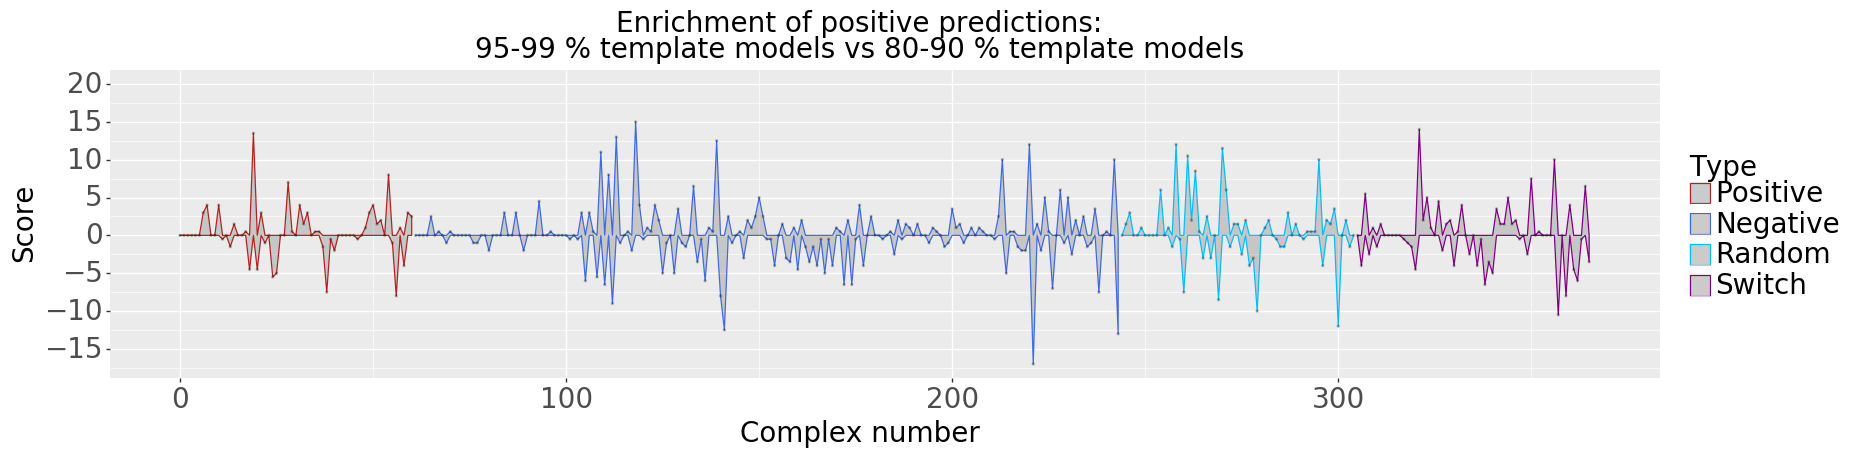

<ggplot: (8742492509921)>


In [2011]:
t_high = t99.copy()
t_high["value"] = (t99["value"] + t95["value"])/2

t_low = t80.copy()
t_low["value"] = (t90["value"] + t80["value"])/2

t_compare = t_high.copy()
t_compare["value"] = t_high["value"] - t_low["value"]

print(plot_heatmap4(t_compare, "Enrichment of positive predictions:\n95-99 % template models vs 80-90 % template models"))

#print(plot_heatmap4(t_high, "High"))
#print(plot_heatmap4(t_low, "Low"))

In [2030]:
import scipy
from scipy.stats import mannwhitneyu
df_high = t_high[t_high["Type"].str.contains("Positive")]
df_low = t_low[t_low["Type"].str.contains("Positive")]

pos_np = df_high["value"].values
neg_np = df_low["value"].values
print("Pos", scipy.stats.mannwhitneyu(pos_np, neg_np))

df_high = t_high[~t_high["Type"].str.contains("Positive")]
df_low = t_low[~t_low["Type"].str.contains("Positive")]

pos_np = df_high["value"].values
neg_np = df_low["value"].values
print("Neg", scipy.stats.mannwhitneyu(pos_np, neg_np))


Pos MannwhitneyuResult(statistic=1734.0, pvalue=0.25487212063289744)
Neg MannwhitneyuResult(statistic=45235.0, pvalue=0.27639939075817327)


In [2028]:
df

variable  value      Type                       Filenames
0          0    0.0  Positive  3qdg_0p_P1_1t_99s_pMHC-TCR.npy
1          1    2.0  Positive  3qdm_0p_P1_1t_99s_pMHC-TCR.npy
2          2    0.0  Positive  4jfd_0p_P1_1t_99s_pMHC-TCR.npy
3          3   -1.0  Positive  4jfe_0p_P1_1t_99s_pMHC-TCR.npy
4          4    0.0  Positive  4jff_0p_P1_1t_99s_pMHC-TCR.npy
5          5    0.0  Positive  4l3e_0p_P1_1t_99s_pMHC-TCR.npy
6          6    0.0  Positive  4mnq_0p_P1_1t_99s_pMHC-TCR.npy
7          7    4.0  Positive  4qok_0p_P1_1t_99s_pMHC-TCR.npy
8          8    0.0  Positive  5d2n_0p_P1_1t_99s_pMHC-TCR.npy
9          9   -1.0  Positive  5e9d_0p_P1_1t_99s_pMHC-TCR.npy
10        10    2.0  Positive  5eu6_0p_P1_1t_99s_pMHC-TCR.npy
11        11    1.0  Positive  5men_0p_P1_1t_99s_pMHC-TCR.npy
12        12    1.5  Positive  3gsn_0p_P1_1t_99s_pMHC-TCR.npy
13        13    1.5  Positive  3hg1_0p_P1_1t_99s_pMHC-TCR.npy
14        14    4.5  Positive  3qdg_0p_N1_1t_99s_pMHC-TCR.npy
15        15    0.0  Positive  3qdg_0p_N2_1t_99s_pMHC-TCR.npy
16        16    0.0  Positive  3qdg_0p_N3_1t_99s_pMHC-TCR.npy
17        17    1.0  Positive  3qdm_0p_N1_1t_99s_pMHC-TCR.npy
18        18   -4.5  Positive  3qdm_0p_N2_1t_99s_pMHC-TCR.npy
19        19    5.5  Positive  3qdm_0p_N3_1t_99s_pMHC-TCR.npy
20        20   -2.0  Positive  4jfd_0p_N1_1t_99s_pMHC-TCR.npy
21        21    0.0  Positive  4jfd_0p_N2_1t_99s_pMHC-TCR.npy
22        22    0.0  Positive  4jfd_0p_N3_1t_99s_pMHC-TCR.npy
23        23    0.0  Positive  4jfe_0p_N1_1t_99s_pMHC-TCR.npy
24        24   -5.5  Positive  4jfe_0p_N2_1t_99s_pMHC-TCR.npy
25        25   -2.5  Positive  4jfe_0p_N3_1t_99s_pMHC-TCR.npy
26        26    0.0  Positive  4jff_0p_N1_1t_99s_pMHC-TCR.npy
27        27    0.0  Positive  4jff_0p_N2_1t_99s_pMHC-TCR.npy
28        28   14.0  Positive  4jff_0p_N3_1t_99s_pMHC-TCR.npy
29        29    2.0  Positive  4l3e_0p_N1_1t_99s_pMHC-TCR.npy
..       ...    ...       ...                             ...
31        31    1.0  Positive  4l3e_0p_N3_1t_99s_pMHC-TCR.npy
32        32    2.0  Positive  4mnq_0p_N1_1t_99s_pMHC-TCR.npy
33        33    4.0  Positive  4mnq_0p_N2_1t_99s_pMHC-TCR.npy
34        34    0.0  Positive  4mnq_0p_N3_1t_99s_pMHC-TCR.npy
35        35    3.5  Positive  4qok_0p_N1_1t_99s_pMHC-TCR.npy
36        36    0.5  Positive  4qok_0p_N2_1t_99s_pMHC-TCR.npy
37        37    5.0  Positive  4qok_0p_N3_1t_99s_pMHC-TCR.npy
38        38    0.0  Positive  5d2n_0p_N1_1t_99s_pMHC-TCR.npy
39        39   -1.0  Positive  5d2n_0p_N2_1t_99s_pMHC-TCR.npy
40        40   -3.0  Positive  5d2n_0p_N3_1t_99s_pMHC-TCR.npy
41        41    0.0  Positive  5e9d_0p_N1_1t_99s_pMHC-TCR.npy
42        42   -1.0  Positive  5e9d_0p_N2_1t_99s_pMHC-TCR.npy
43        43    0.0  Positive  5e9d_0p_N3_1t_99s_pMHC-TCR.npy
44        44   -1.0  Positive  5eu6_0p_N1_1t_99s_pMHC-TCR.npy
45        45    0.0  Positive  5eu6_0p_N2_1t_99s_pMHC-TCR.npy
46        46   -1.5  Positive  5eu6_0p_N3_1t_99s_pMHC-TCR.npy
47        47   -2.0  Positive  5men_0p_N1_1t_99s_pMHC-TCR.npy
48        48  -11.0  Positive  5men_0p_N2_1t_99s_pMHC-TCR.npy
49        49    9.0  Positive  5men_0p_N3_1t_99s_pMHC-TCR.npy
50        50    4.0  Positive  3gsn_0p_N1_1t_99s_pMHC-TCR.npy
51        51    1.5  Positive  3gsn_0p_N2_1t_99s_pMHC-TCR.npy
52        52    3.0  Positive  3gsn_0p_N3_1t_99s_pMHC-TCR.npy
53        53    0.0  Positive  3hg1_0p_N1_1t_99s_pMHC-TCR.npy
54        54    9.5  Positive  3hg1_0p_N2_1t_99s_pMHC-TCR.npy
55        55    1.0  Positive  3hg1_0p_N3_1t_99s_pMHC-TCR.npy
56        56    9.5  Positive  3qdg_0p_R1_1t_99s_pMHC-TCR.npy
57        57    3.5  Positive  3qdm_0p_R1_1t_99s_pMHC-TCR.npy
58        58    7.0  Positive  4jfd_0p_R1_1t_99s_pMHC-TCR.npy
59        59    6.0  Positive  4jfe_0p_R1_1t_99s_pMHC-TCR.npy
60        60    6.0  Positive  4jff_0p_R1_1t_99s_pMHC-TCR.npy

[61 rows x 4 columns]

In [2012]:
extract_stats(t_compare, "Positive")

Length: 61
Over No, avg, rat
[17, 4.029, 0.279]
under no, avg, rat
[10, -4.4, 0.164]


In [2013]:
extract_stats(t_compare, "Negative")

Length: 183
Over No, avg, rat
[42, 4.643, 0.23]
under no, avg, rat
[41, -4.732, 0.224]


99


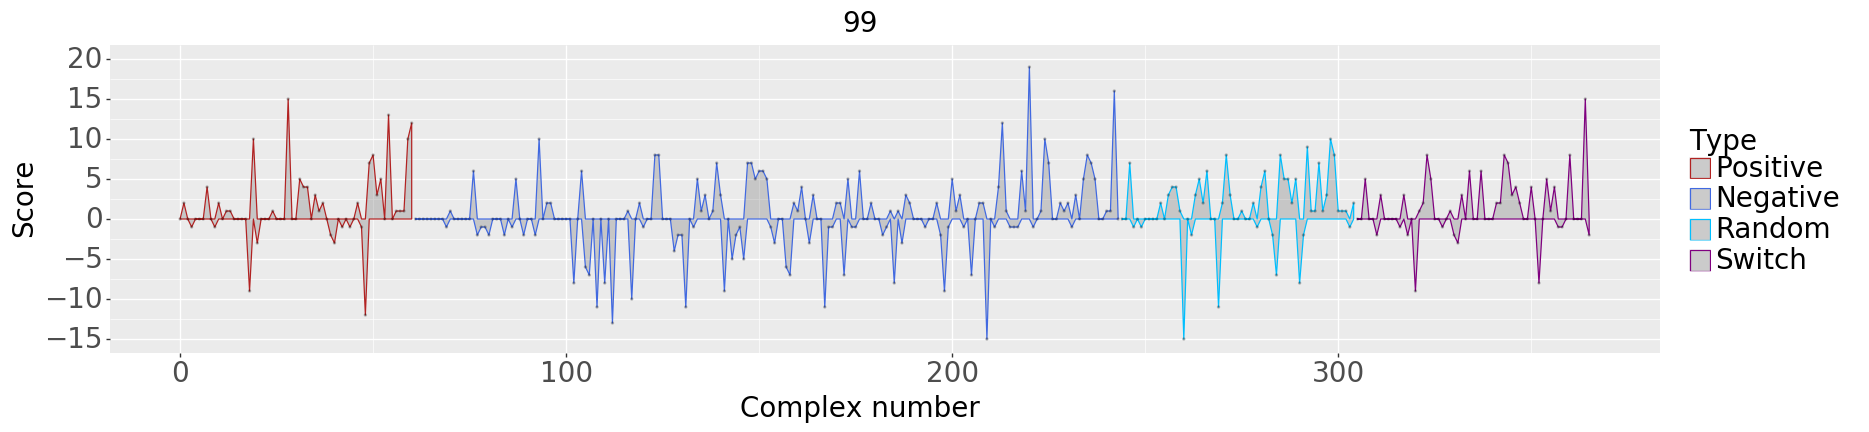

<ggplot: (8742493029710)>
95


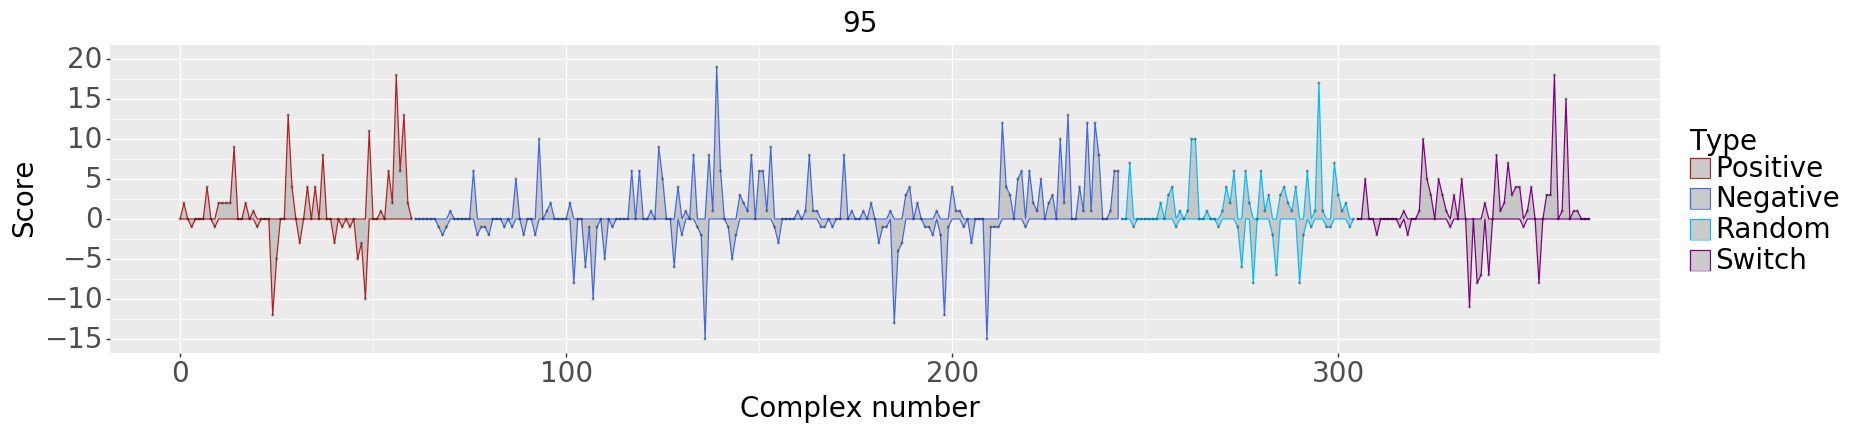

<ggplot: (-9223363294362106301)>
90


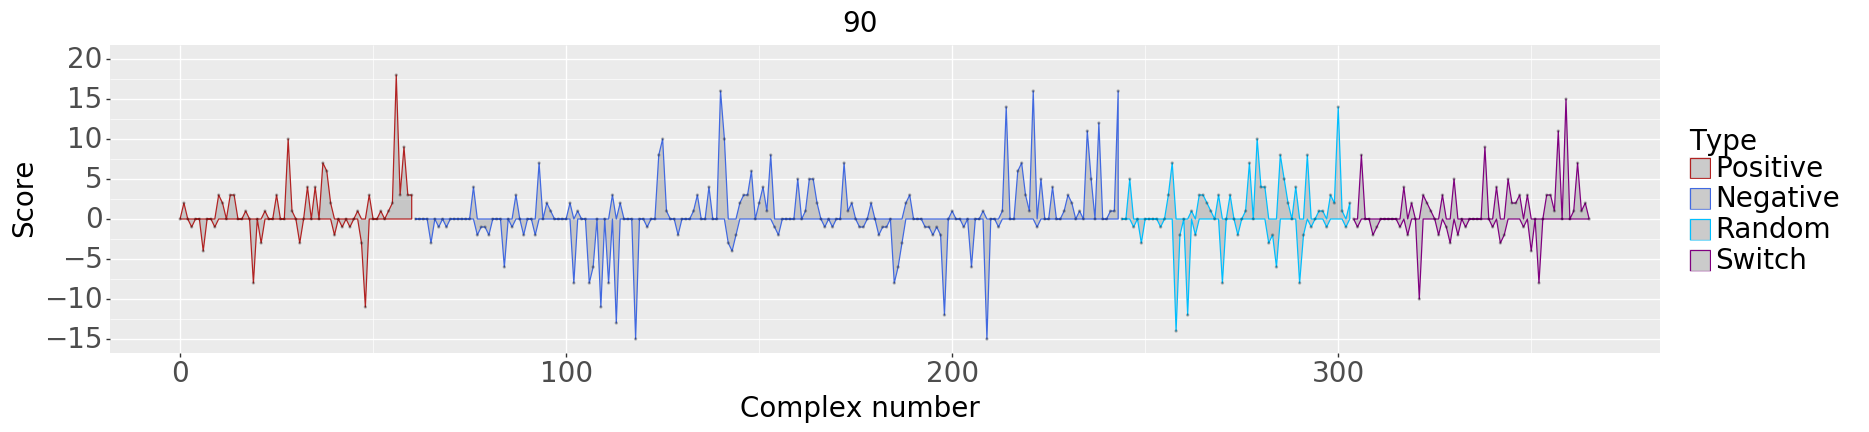

<ggplot: (8742492274289)>
80


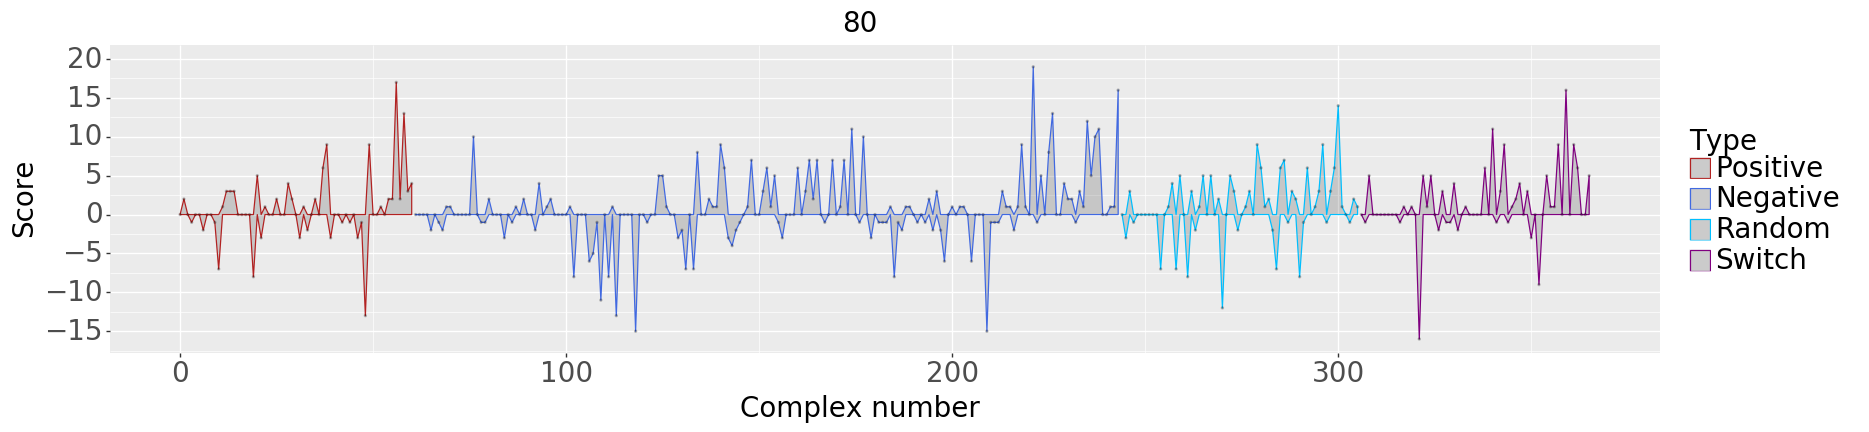

<ggplot: (8742495811830)>


In [1882]:
titles = ["99", "95", "90", "80"]
dfs = [t99, t95, t90, t80]

#print
for i in range(len(titles)):
    print(titles[i])
    print(plot_heatmap4(dfs[i], titles[i]))

In [97]:
def plot_heatmap4(melt_df1, name, color = "red", length = 20):
    return(ggplot(melt_df1, aes("variable", "value"))
     + geom_area(aes(colour = "Type"), data = melt_df1, alpha = 0.2, size = 0.5)
     + geom_point(data = melt_df1, alpha = 0.2, color = "black", size = 0.4)
     + theme(axis_text_x=element_text(size = 12))
     + ggtitle(name)
     + xlab("Complex number")
     + ylab("Score")
     + expand_limits(y=[0, length])
    + scale_y_continuous(breaks=(-20, -15, -10, -5, 0,5,10,15,20))
     + theme(figure_size = ([20,4]), text = element_text(size = 20))
    + scale_color_manual(["firebrick", "royalblue", "deepskyblue", "purple"])
    )

In [98]:
def plot_heatmap5(melt_df1, name, color = "red", length = 20):
    return(ggplot(melt_df1, aes("variable", "value"))
     + geom_area(aes(colour = "Type"), data = melt_df1, alpha = 0.2, size = 0.5)
     + geom_point(data = melt_df1, alpha = 0.2, color = "black", size = 0.4)
     + theme(axis_text_x=element_text(size = 12))
     + ggtitle(name)
     + xlab("Complex number")
     + ylab("Score")
     + expand_limits(y=[0, length])
    + scale_y_continuous(breaks=(-20, -15, -10, -5, 0,5,10,15,20))
     + theme(figure_size = ([20,4]), text = element_text(size = 20))
    + scale_color_manual(["firebrick", "royalblue", "deepskyblue", "purple"])
    )

Prediction graph:
Aminos
 AAs S CSV/CSV_big3.csv


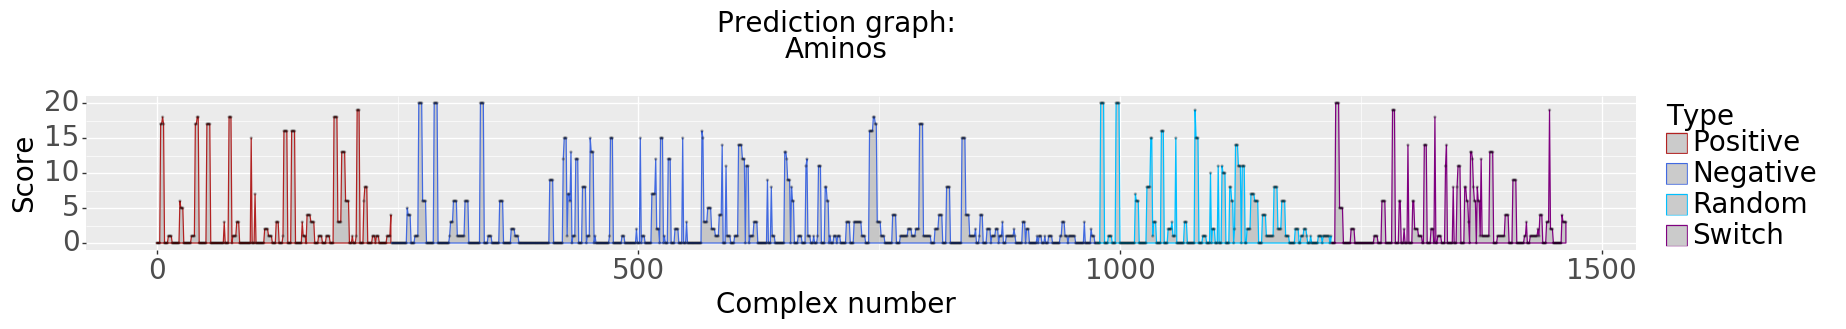

<ggplot: (-9223363294359110389)>
Saving to img/superpreds_aminos.png
Prediction graph:
All features
 all80 S CSV/CSV_big3.csv


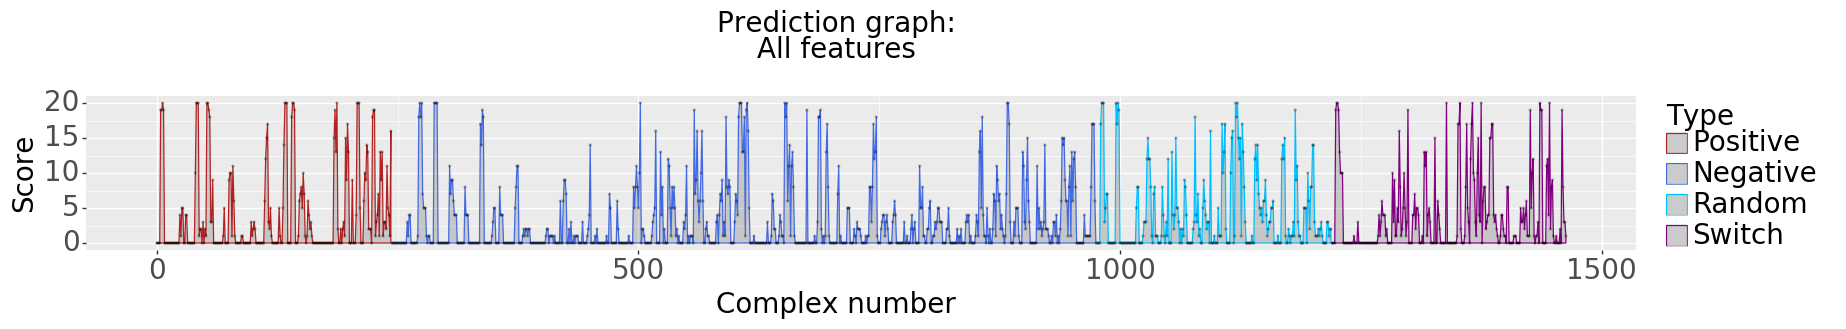

<ggplot: (8742493279636)>
Saving to img/superpreds_all80.png
Prediction graph:
Energy terms
 24energy CSV/CSV_big3.csv


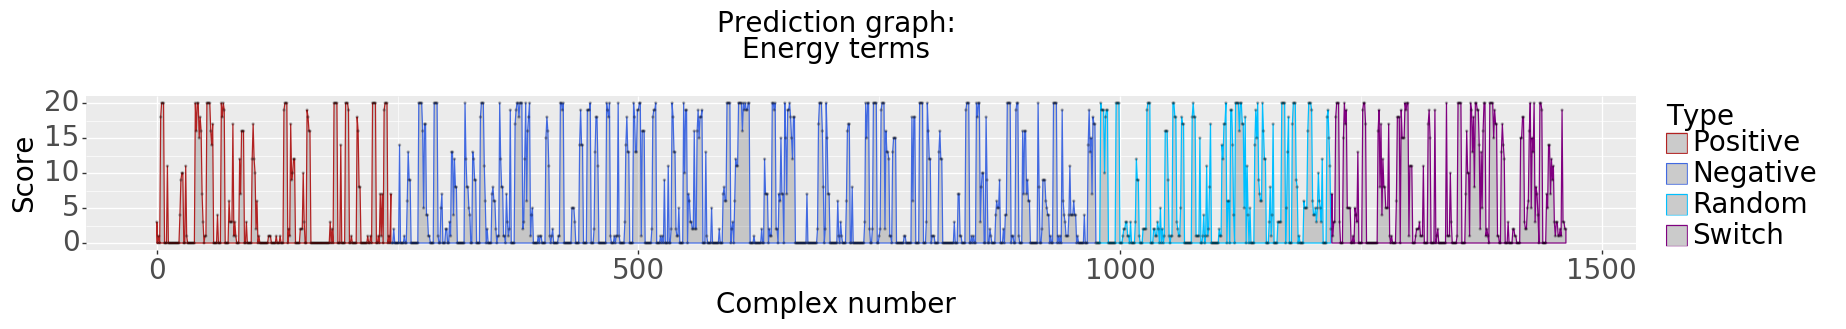

<ggplot: (-9223363294361632028)>
Saving to img/superpreds_24energy.png
Prediction graph:
Structure
 Struc36 CSV/CSV_big3.csv


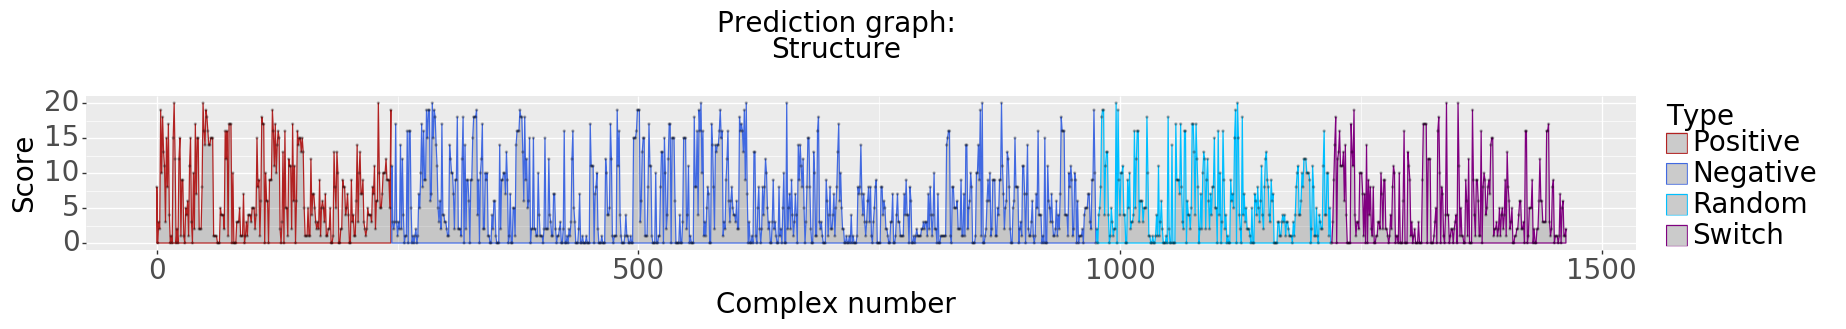

<ggplot: (-9223363294349367664)>
Saving to img/superpreds_Struc36.png
Prediction graph:
Structure + Energy terms
 Struc\+24E CSV/CSV_big3.csv


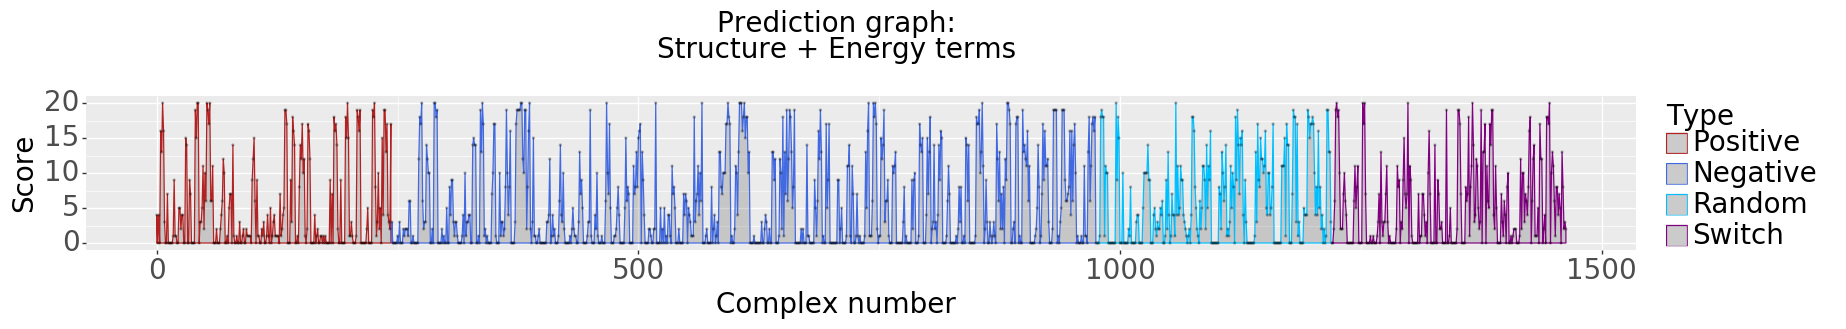

<ggplot: (8742496053140)>
Saving to img/superpreds_Struc24energy.png
Prediction graph:
Aminos + Structure
 all56 CSV/CSV_big3.csv


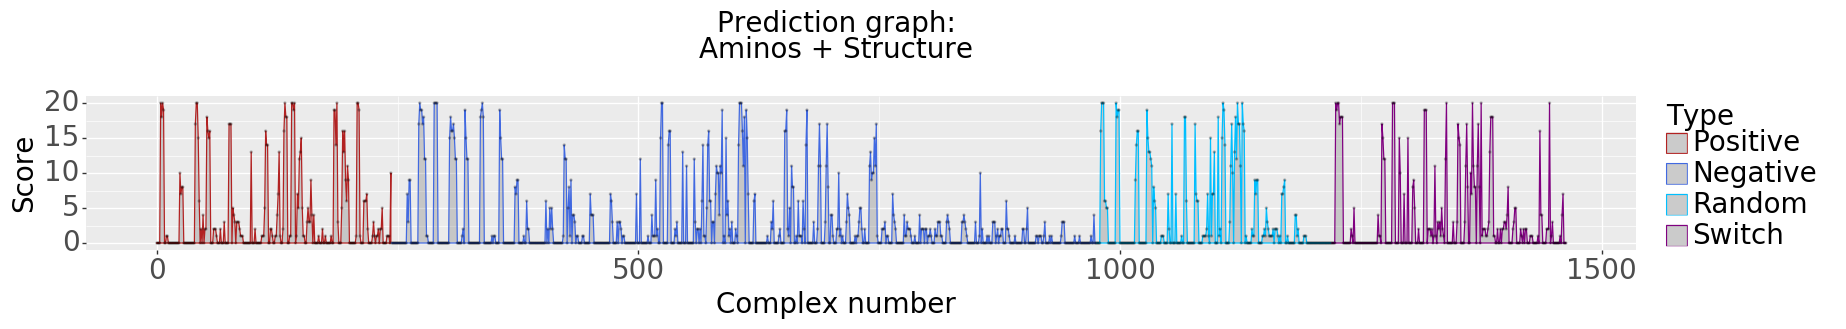

<ggplot: (-9223363294357962843)>
Saving to img/superpreds_all56.png
Prediction graph:
Aminos(-peptide)
 AApep CSV/CSV_big3.csv


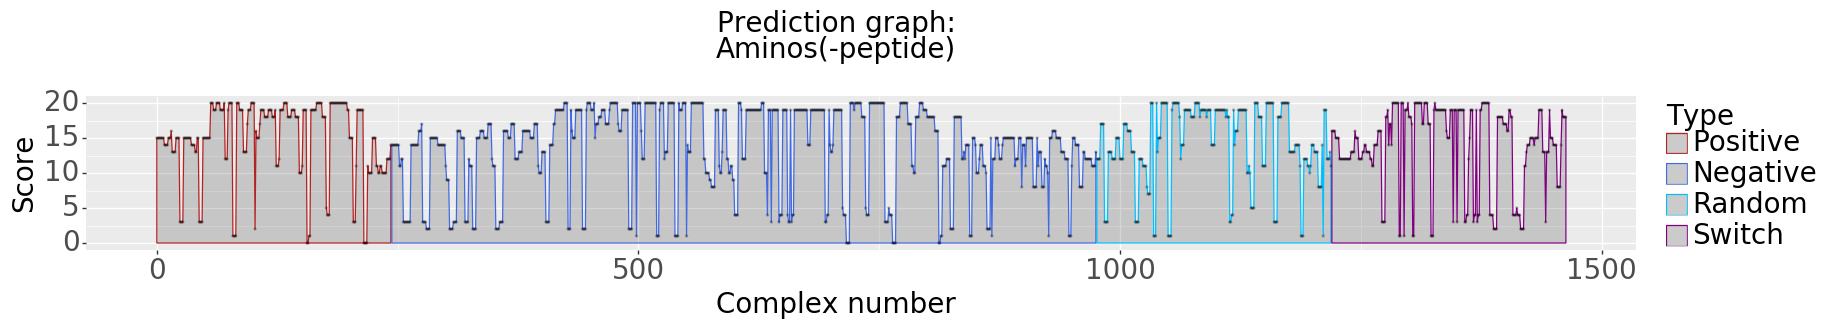

<ggplot: (8742493813519)>
Saving to img/superpreds_AApep.png


In [1745]:
filenames = ["CSV/CSV_big3.csv"]*len(comments)
comments = ["AAs S", "all80 S", "24energy", "Struc36",
            "Struc\+24E", "all56", "AApep"]
savenames = ["aminos", "all80", "24energy", "Struc36",
            "Struc24energy", "all56", "AApep"]
titles = ["Aminos", "All features", "Energy terms", "Structure",
          "Structure + Energy terms", "Aminos + Structure",
          "Aminos(-peptide)"]
for i in range(len(titles)):
    titles[i] = "Global prediction graph:\n" + titles[i] + "\n"
    savenames[i] = savenames[i]+"2"

for i3 in range(0, len(comments)):
    print(titles[i3], comments[i3], filenames[i3])

    dfs = []
    for i2 in range(0, 5):
        #Same settings for each val-set
        comment = [comments[i3]]
        filename = [filenames[i3]]
        title = titles[i3]

        #Load from valset and append to dfs
        #val_set = [i2] * len(filenames)
        val_set = [i2]
        df, fs = multi_load2(filename, comment, title, val_set, uber_list, length = 20)
        dfs.append(df)

        #Extract groups
        list_pos = []
        list_neg = []
        list_random = []
        list_switch = []
        for i in range(len(dfs)):
            df = dfs[i][0]
            pos = df[df["Type"].str.contains("Positive")]
            neg = df[df["Type"].str.contains("Negative")]
            random = df[df["Type"].str.contains("Random")]
            switch = df[df["Type"].str.contains("Switch")]
            list_pos.append(pos)
            list_neg.append(neg)
            list_random.append(random)
            list_switch.append(switch)

    #Concat to super df
    pos = pd.concat(list_pos).reset_index(drop=True)
    neg = pd.concat(list_neg).reset_index(drop=True)
    random = pd.concat(list_random).reset_index(drop=True)
    switch = pd.concat(list_switch).reset_index(drop=True)

    super_df = pd.concat((pos, neg, random, switch)).reset_index(drop=True)
    super_df["variable"] = super_df.index

    #plot
    plot = plot_heatmap3(super_df, title)
    print(plot)
    filename = "img/superpreds_"+str(savenames[i3])+".png"
    print("Saving to", filename)
    plot.save(filename = filename, verbose = True)
    

In [1705]:
titles

'A'

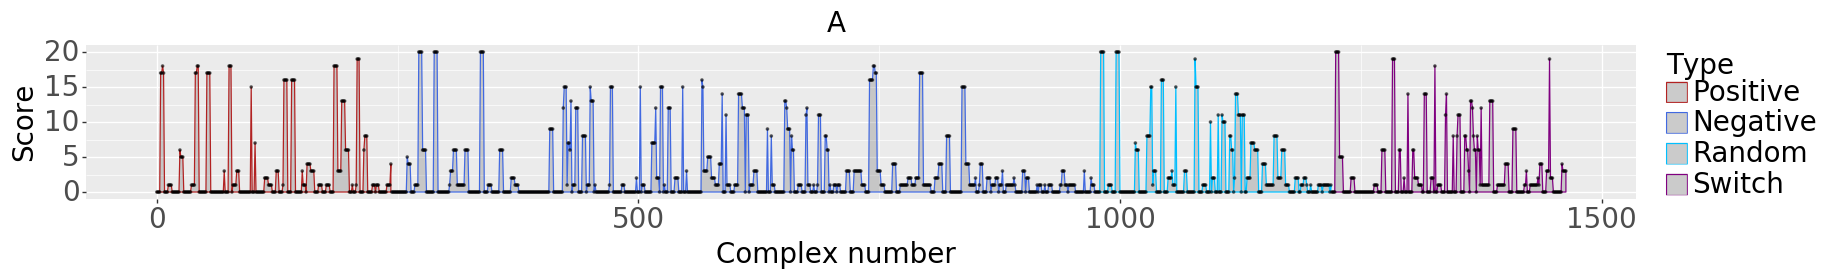

<ggplot: (8742495052450)>

In [1689]:
plot_heatmap3(super_df, titles[i3])

#### Autosave

0


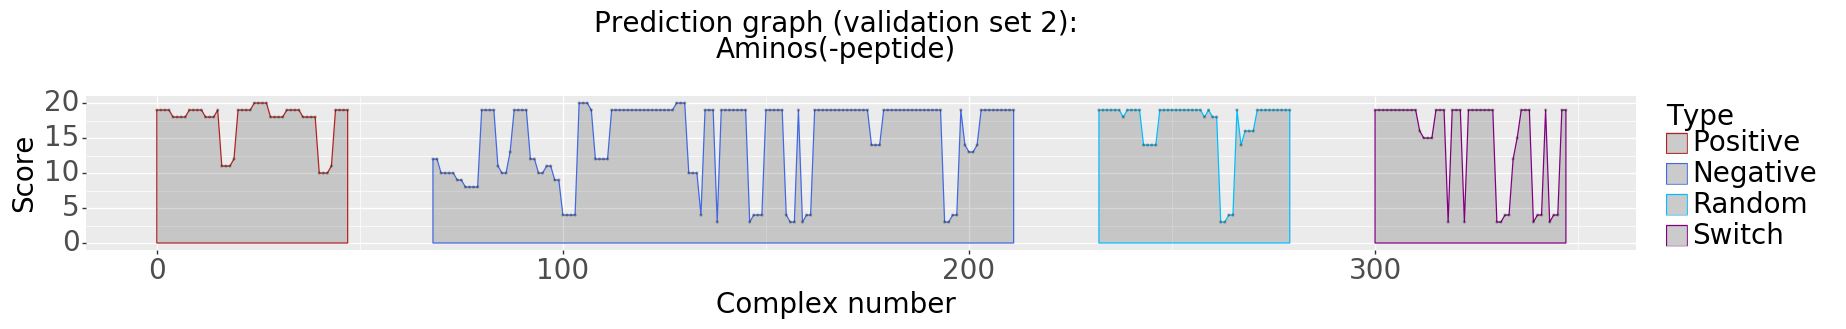

<ggplot: (-9223363309409299063)>


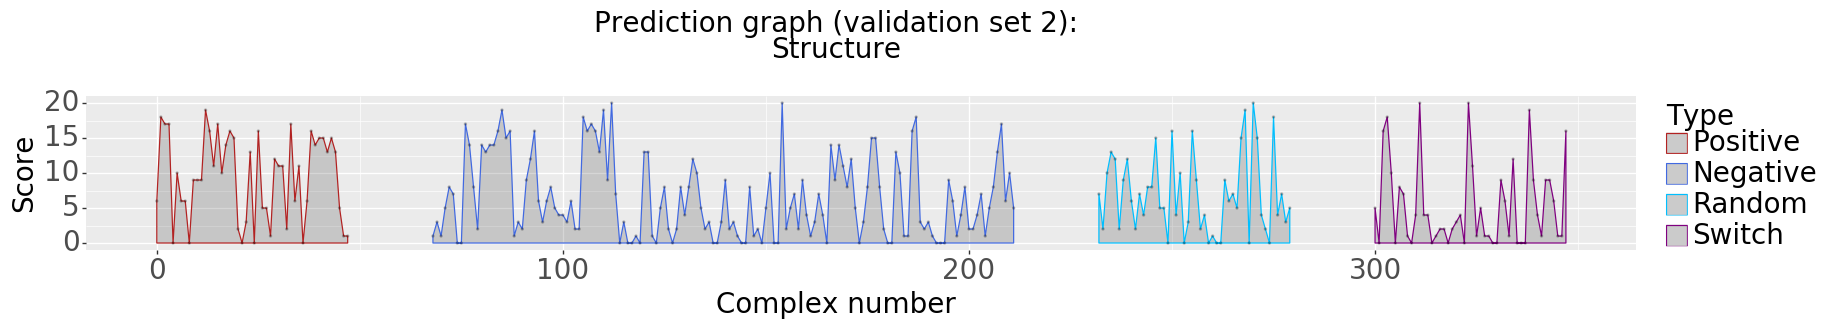

<ggplot: (8727446308984)>


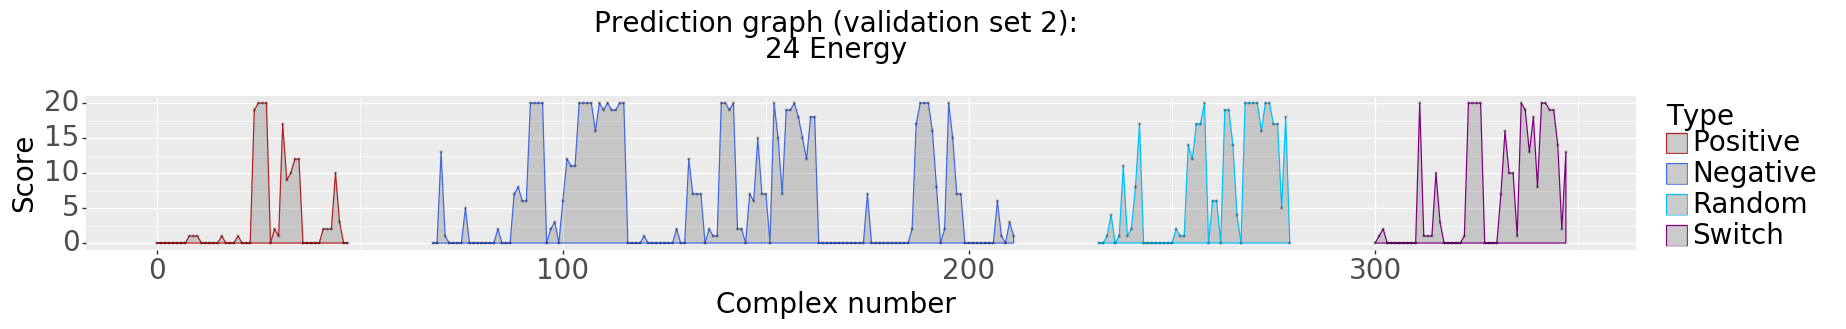

<ggplot: (8727445737108)>


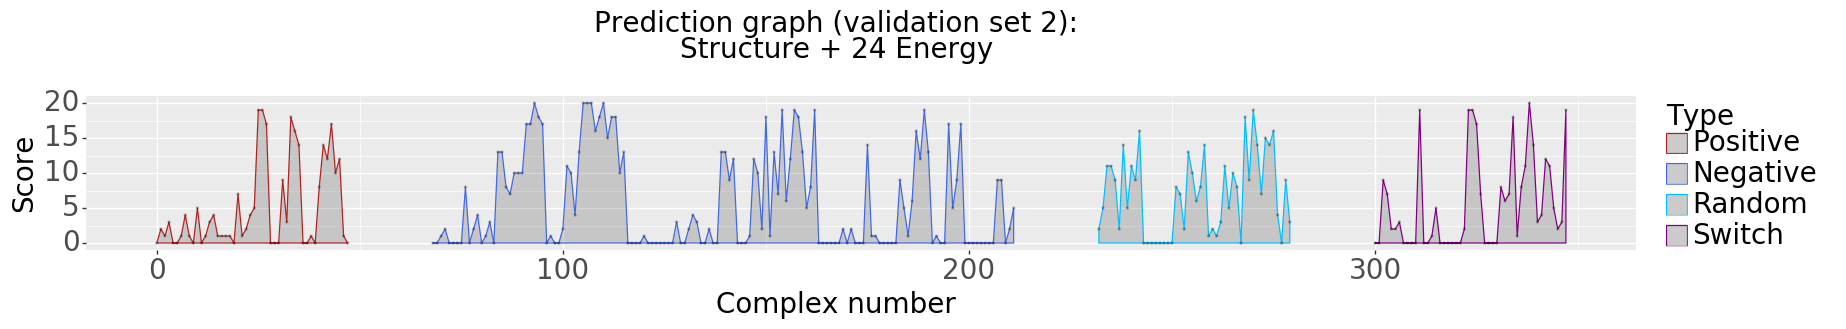

<ggplot: (8727446363989)>


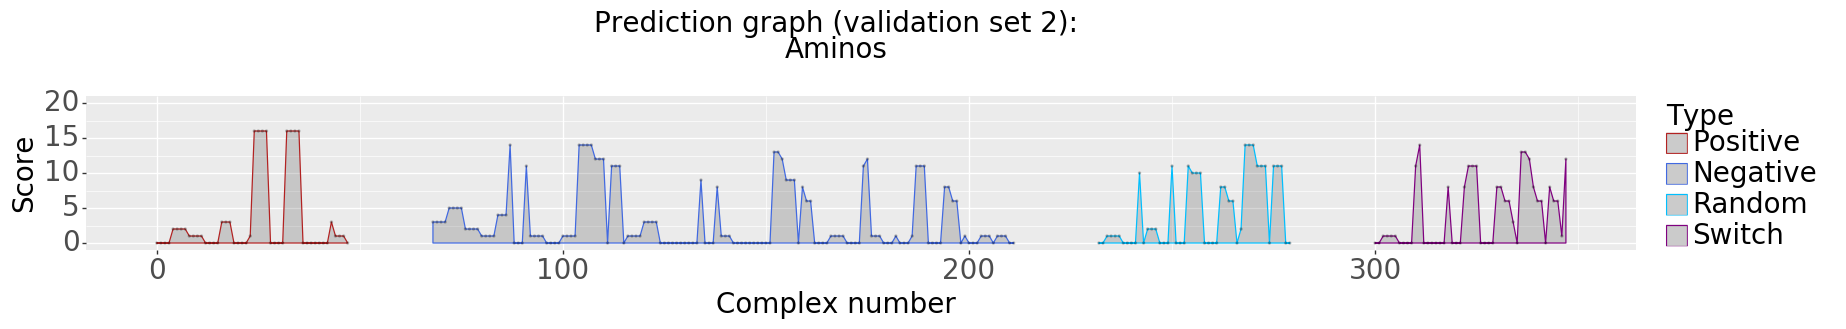

<ggplot: (-9223363309411153678)>


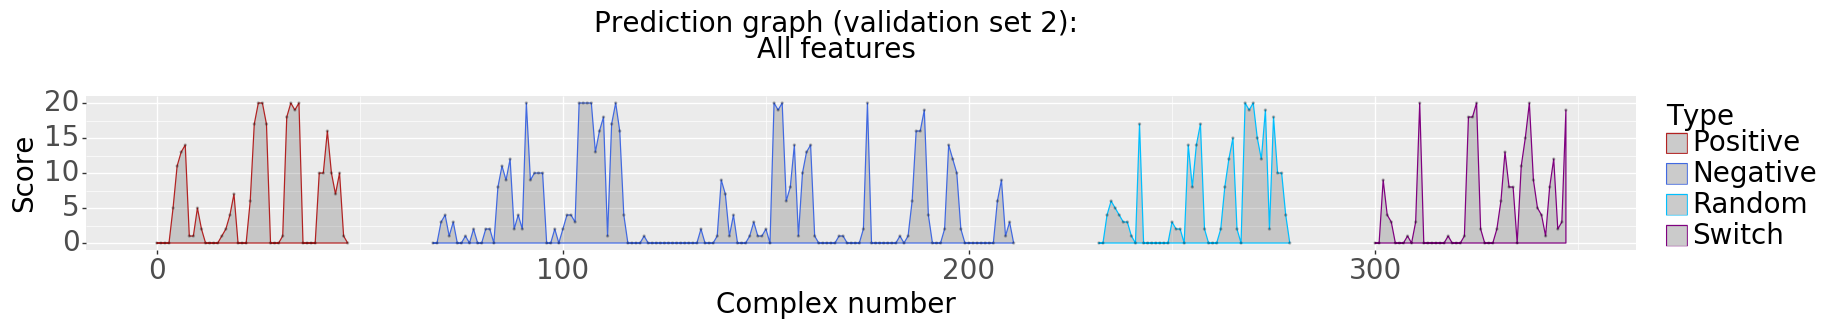

<ggplot: (-9223363309409153827)>


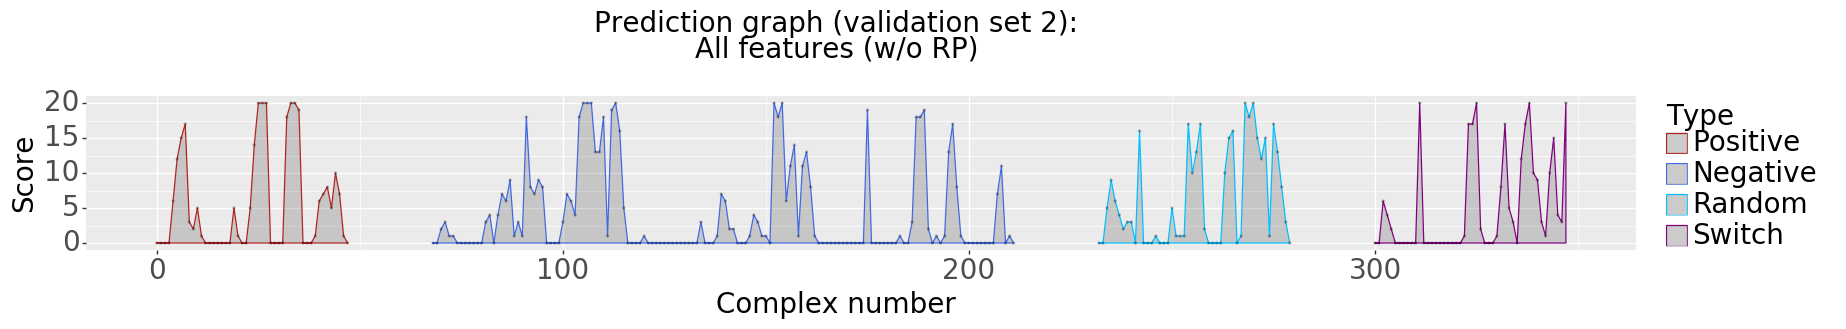

<ggplot: (8727445694945)>


In [63]:
for i2 in range(0, 1):
    print(i2)
    comments = ["AApep", "Struc36", "24energy", "Struc\+24", "AAs S", "all80rp", "all80 S"]
    filenames = ["CSV/CSV_big3.csv"]*len(comments)
    titles = ["Aminos(-peptide)", "Structure", "24 Energy", "Structure + 24 Energy", "Aminos", "All features", "All features (w/o RP)"]
    savenames = ["amino_minuspep", "struc", "24energy", "struc24energy", "aminos", "All_RP)", "All_noRP"]
    
    val_set = [2] * len(filenames)
    #colors = ["blue"]*len(filenames)

    for i in range(len(titles)): titles[i] = "Prediction graph (validation set " + str(val_set[i])+"):\n" + titles[i]+"\n"

    dfs, fs = multi_load2(filenames, comments, titles, val_set, uber_list, length = 20)
    
    for i in range(len(dfs)):
        plot = plot_heatmap3(dfs[i], titles[i], length = 20)
        plot.save(filename = "img/pred_graph_val_"+str(i2)+"_"+str(savenames[i]) + ".png", verbose = True)
        print(plot)

In [428]:
filenames = ["CSV/CSV_big.csv", "CSV/CSV_big.csv", "CSV/CSV_big.csv",
            "CSV_big2.csv", "CSV_big2.csv"]
comments = ["Struc36 S", "AAs S", "all56 S",
           "4s80 S", "6s80dp0.30"]
titles = ["Structure + 10 Energy", "Aminos", "Aminos + Structure",
         "All + 24 Energy", "6S"]
colors = ["blue"]*len(filenames)

val_set = [2] * len(filenames)


for i in range(len(titles)): titles[i] += ":\n Validation set " + str(val_set[i]) + "\n"

dfs, fs = multi_load(filenames, comments, titles, val_set, uber_list, length = 20)



In [429]:
for i in range(len(dfs)):
    print(plot_heatmap3(dfs[i], titles[i], colors[i], length = 20))

TypeError: plot_heatmap3() got an unexpected keyword argument 'length'

## easy compare
val_set = 1
melt_df1, f1 = load_data(filename = "CSV_big2.csv", comment = "6s80dp0\.30", val_set = val_set, uber_list = uber_list, filenames = True)
melt_df2, f2 = load_data(filename = "CSV/CSV_big.csv", comment = "AAs S", val_set = val_set, uber_list = uber_list, filenames = True)
all_df = all_df_filenames(melt_df1, melt_df2, f1, val_set = val_set, shape_list = shape_list)
melt_df1 = fix_width(melt_df1, 0)
melt_df2 = fix_width(melt_df2, 0)
title = "Partition 2 predictions, All-features + 5 energy terms (red) vs Aminos (blue)"
title = "Example of model which fails to train (red)"
print(plot_heatmap_same(melt_df1, melt_df2, name = title))



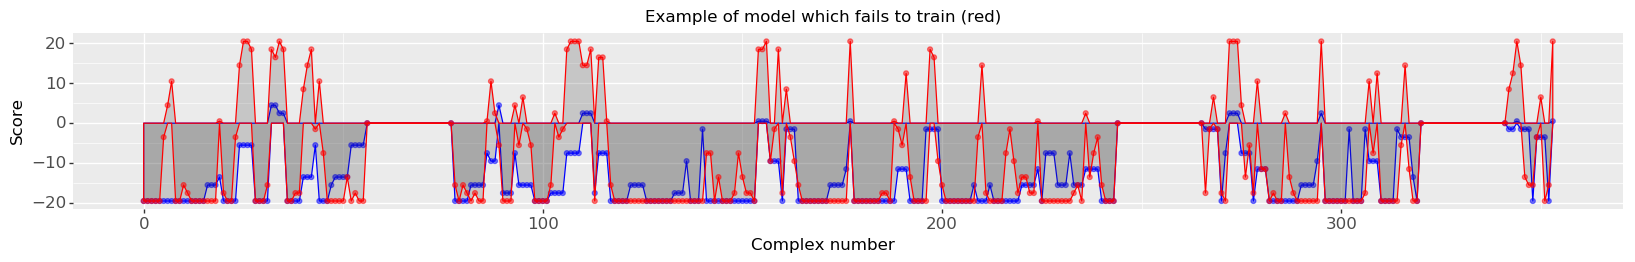

<ggplot: (-9223363294356938345)>


In [94]:
#easy compare
val_set = 2
melt_df1, f1 = load_data(filename = "CSV_big2.csv", comment = "4s80 S", val_set = val_set, uber_list = uber_list, filenames = True)
melt_df2, f2 = load_data(filename = "CSV/CSV_big.csv", comment = "AAs S", val_set = val_set, uber_list = uber_list, filenames = True)
all_df = all_df_filenames(melt_df1, melt_df2, f1, val_set = val_set, shape_list = shape_list)

melt_df1 = fix_width(melt_df1, 0)
melt_df2 = fix_width(melt_df2, 0)
title = "Partition 2 predictions, All-features + 5 energy terms (red) vs Aminos (blue)"
title = "Example of model which fails to train (red)"
print(plot_heatmap_same(melt_df1, melt_df2, name = title))



In [95]:
melt_df1, f1 = load_data(filename = "CSV_big2.csv", comment = "4s80 S", val_set = val_set, uber_list = uber_list, filenames = True)
melt_df2, f2 = load_data(filename = "CSV/CSV_big.csv", comment = "AAs S", val_set = val_set, uber_list = uber_list, filenames = True)
all_df = all_df_filenames(melt_df1, melt_df2, f1, val_set = val_set, shape_list = shape_list)


-234.0 144
102.0 48
Pos -2.625 Neg -1.625 
Ran 2.125 Switch -2.917


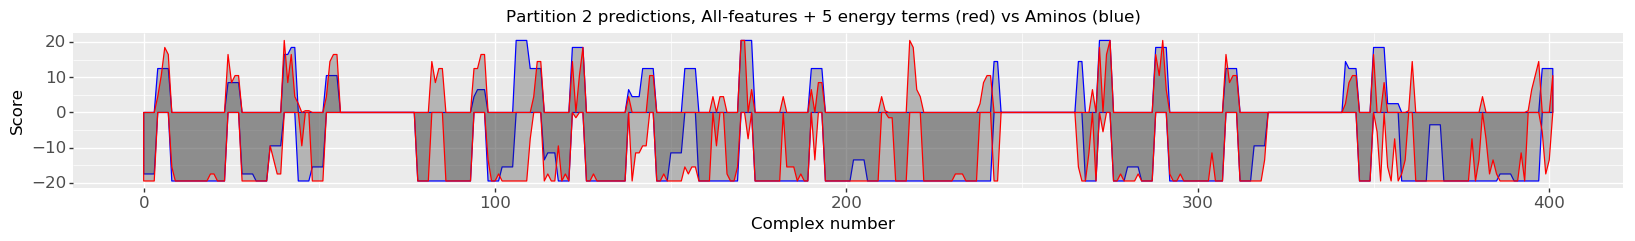

<ggplot: (8779918482373)>

In [210]:
#melt_df2, f2 = load_data(filename = "CSV/CSV_big.csv", comment = "AAs S", val_set = 0, uber_list = uber_list, filenames = True)
melt_df1, f1 = load_data(filename = "CSV/12sets.csv", comment = "RealNewstruc60\+5E S:20", val_set = 0, uber_list = uber_list, filenames = True)
melt_df2, f2 = load_data(filename = "CSV/CSV_big.csv", comment = "AAs S", val_set = 0, uber_list = uber_list, filenames = True)

#All df
all_df = all_df_filenames(melt_df1, melt_df2, f1, val_set = 2, shape_list = shape_list)

#calculate net_change
melt_df3 = melt_df1.copy()
melt_df3["value"] = melt_df1["value"] - melt_df2["value"]
net_change(melt_df3, shape_list[2])

#fixwidth
melt_df1 = fix_width(melt_df1, 0)
melt_df2 = fix_width(melt_df2, 0)

plot_heatmap_same(melt_df1, melt_df2, name = "Partition 2 predictions, All-features + 5 energy terms (red) vs Aminos (blue)")